In [1]:
library(readr)
library(dplyr)
library(lubridate)
library(DT)
library(ggplot2)
library(ggthemes)
library(patchwork)
library(tidyverse)
library(rlang)

library(corrplot)
library(magick)
library(reshape2)


library(gridExtra)
library(zoo) 

library(tensorflow)

library(keras) 

tf$config$list_physical_devices('GPU')




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats 1.0.0     ✔ tibble  3.2.1
✔ purrr   1.0.2     ✔ tidyr   1.3.1
✔ stringr 1.5.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘rlang’


The following objects are masked from ‘package:purrr’:

    %@%, flatten, flatten_chr, flatten_dbl, flatten_int, flatten_lgl,
    flatten_raw, invoke, splice


corrplot 0.92 loaded

Linking to ImageMagick 6.9

[[1]]
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')

[[2]]
PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')


| Column Name | Description |
|-------------|-------------|
| date        | Date and time of the observation. |
| p           | Atmospheric pressure in millibars (mbar). |
| T           | Air temperature in degrees Celsius (°C). |
| Tpot        | Potential temperature in Kelvin (K), representing the temperature an air parcel would have if moved to a standard pressure level. |
| Tdew        | Dew point temperature in degrees Celsius (°C), indicating the temperature at which air becomes saturated with moisture. |
| rh          | Relative humidity as a percentage (%), showing the amount of moisture in the air relative to the maximum it can hold at that temperature. |
| VPmax       | Maximum vapor pressure in millibars (mbar), representing the maximum pressure exerted by water vapor at the given temperature. |
| VPact       | Actual vapor pressure in millibars (mbar), indicating the current water vapor pressure in the air. |
| VPdef       | Vapor pressure deficit in millibars (mbar), measuring the difference between maximum and actual vapor pressure, used to gauge drying potential. |
| sh          | Specific humidity in grams per kilogram (g/kg), showing the mass of water vapor per kilogram of air. |
| H2OC        | Concentration of water vapor in millimoles per mole (mmol/mol) of dry air. |
| rho         | Air density in grams per cubic meter (g/m³), reflecting the mass of air per unit volume. |
| wv          | Wind speed in meters per second (m/s), measuring the horizontal motion of air. |
| max. wv     | Maximum wind speed in meters per second (m/s), indicating the highest recorded wind speed over the period. |
| wd          | Wind direction in degrees (°), representing the direction from which the wind is blowing. |
| rain        | Total rainfall in millimeters (mm), showing the amount of precipitation over the observation period. |
| raining     | Duration of rainfall in seconds (s), recording the time for which rain occurred during the observation period. |
| SWDR        | Short-wave downward radiation in watts per square meter (W/m²), measuring incoming solar radiation. |
| PAR         | Photosynthetically active radiation in micromoles per square meter per second (µmol/m²/s), indicating the amount of light available for photosynthesis. |
| max. PAR    | Maximum photosynthetically active radiation recorded in the observation period in µmol/m²/s. |
| Tlog        | Temperature logged in degrees Celsius (°C), potentially from a secondary sensor or logger. |
| OT          | Likely refers to an "operational timestamp" or an offset in time, but may need clarification depending on the dataset's context. |


<div style="text-align:center; border-radius:25px 80px; padding:9px; color:#f0f0f0; margin:0; font-size:300%; font-family:Pacifico; background-color:#2e7d32; overflow:hidden">
<b>Read Data</b>
</div>


In [2]:
df=read_csv("/kaggle/input/weather-long-term-time-series-forecasting/cleaned_weather.csv")

Rows: 52696 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (20): p, T, Tpot, Tdew, rh, VPmax, VPact, VPdef, sh, H2OC, rho, wv, max...
dttm  (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


<div style="text-align:center; border-radius:25px 80px; padding:9px; color:#f0f0f0; margin:0; font-size:300%; font-family:Pacifico; background-color:#2e7d32; overflow:hidden">
<b>Read Fives Rows From Data</b>
</div>


In [3]:
datatable(head(df),options=list(scrollX=TRUE,scrollY="400px",pageLength=5,autoWidth=TRUE))

HTML widgets cannot be represented in plain text (need html)

In [4]:
dim(df)

[1] 52696    21

In [5]:
colSums(is.na(df))

date        p        T     Tpot     Tdew       rh    VPmax    VPact 
       0        0        0        0        0        0        0        0 
   VPdef       sh     H2OC      rho       wv  max. wv       wd     rain 
       0        0        0        0        0        0        0        0 
 raining     SWDR      PAR max. PAR     Tlog 
       0        0        0        0        0

In [6]:
str(df)

spc_tbl_ [52,696 × 21] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ date    : POSIXct[1:52696], format: "2020-01-01 00:10:00" "2020-01-01 00:20:00" ...
 $ p       : num [1:52696] 1009 1009 1009 1009 1009 ...
 $ T       : num [1:52696] 0.71 0.75 0.73 0.37 0.33 0.34 0.19 0.03 0.11 0.22 ...
 $ Tpot    : num [1:52696] 273 273 273 273 273 ...
 $ Tdew    : num [1:52696] -1.33 -1.44 -1.48 -1.64 -1.5 -1.54 -1.65 -1.7 -1.61 -1.62 ...
 $ rh      : num [1:52696] 86.1 85.2 85.1 86.3 87.4 87.1 87.4 88.1 88.1 87.4 ...
 $ VPmax   : num [1:52696] 6.43 6.45 6.44 6.27 6.26 6.26 6.19 6.12 6.16 6.2 ...
 $ VPact   : num [1:52696] 5.54 5.49 5.48 5.41 5.47 5.45 5.41 5.39 5.43 5.42 ...
 $ VPdef   : num [1:52696] 0.89 0.95 0.96 0.86 0.79 0.81 0.78 0.73 0.73 0.78 ...
 $ sh      : num [1:52696] 3.42 3.39 3.39 3.35 3.38 3.37 3.34 3.33 3.35 3.35 ...
 $ H2OC    : num [1:52696] 5.49 5.45 5.43 5.37 5.42 5.41 5.37 5.35 5.38 5.38 ...
 $ rho     : num [1:52696] 1281 1280 1280 1282 1282 ...
 $ wv      : num [1:52696] 1.02 

In [7]:
summary(df)

      date                             p                T        
 Min.   :2020-01-01 00:10:00.0   Min.   : 955.6   Min.   :-6.44  
 1st Qu.:2020-04-01 11:47:30.0   1st Qu.: 984.8   1st Qu.: 4.59  
 Median :2020-07-02 00:45:00.0   Median : 990.9   Median :10.23  
 Mean   :2020-07-02 00:11:52.2   Mean   : 990.0   Mean   :10.82  
 3rd Qu.:2020-10-01 12:22:30.0   3rd Qu.: 995.9   3rd Qu.:16.18  
 Max.   :2021-01-01 00:00:00.0   Max.   :1020.1   Max.   :34.80  
      Tpot            Tdew                rh             VPmax      
 Min.   :266.2   Min.   :-13.8100   Min.   : 21.16   Min.   : 3.77  
 1st Qu.:278.6   1st Qu.:  0.7775   1st Qu.: 58.82   1st Qu.: 8.48  
 Median :284.3   Median :  5.2600   Median : 75.40   Median :12.48  
 Mean   :284.8   Mean   :  5.4091   Mean   : 72.49   Mean   :14.49  
 3rd Qu.:290.3   3rd Qu.:  9.7000   3rd Qu.: 87.90   3rd Qu.:18.42  
 Max.   :309.1   Max.   : 20.5000   Max.   :100.00   Max.   :55.67  
     VPact            VPdef             sh             

In [8]:
df$date <- as.POSIXct(df$date, format = "%Y-%m-%dT%H:%M:%SZ", tz = "UTC")

In [9]:
df <- df %>%mutate(year = year(date),month = month(date, label = TRUE),day = yday(date),hour = hour(date))

In [10]:
colnames(df)<-make.names(colnames(df))

In [11]:
all_vars <- colnames(df)[!colnames(df) %in% c("date", "year", "month", "day", "hour")]
key_vars <- c("T", "rh", "wv", "rain", "SWDR", "PAR")  

<div style="text-align:center; border-radius:25px 80px; padding:9px; color:#f0f0f0; margin:0; font-size:300%; font-family:Pacifico; background-color:#2e7d32; overflow:hidden">
<b>Function to plot time series for a given variable</b>
</div>


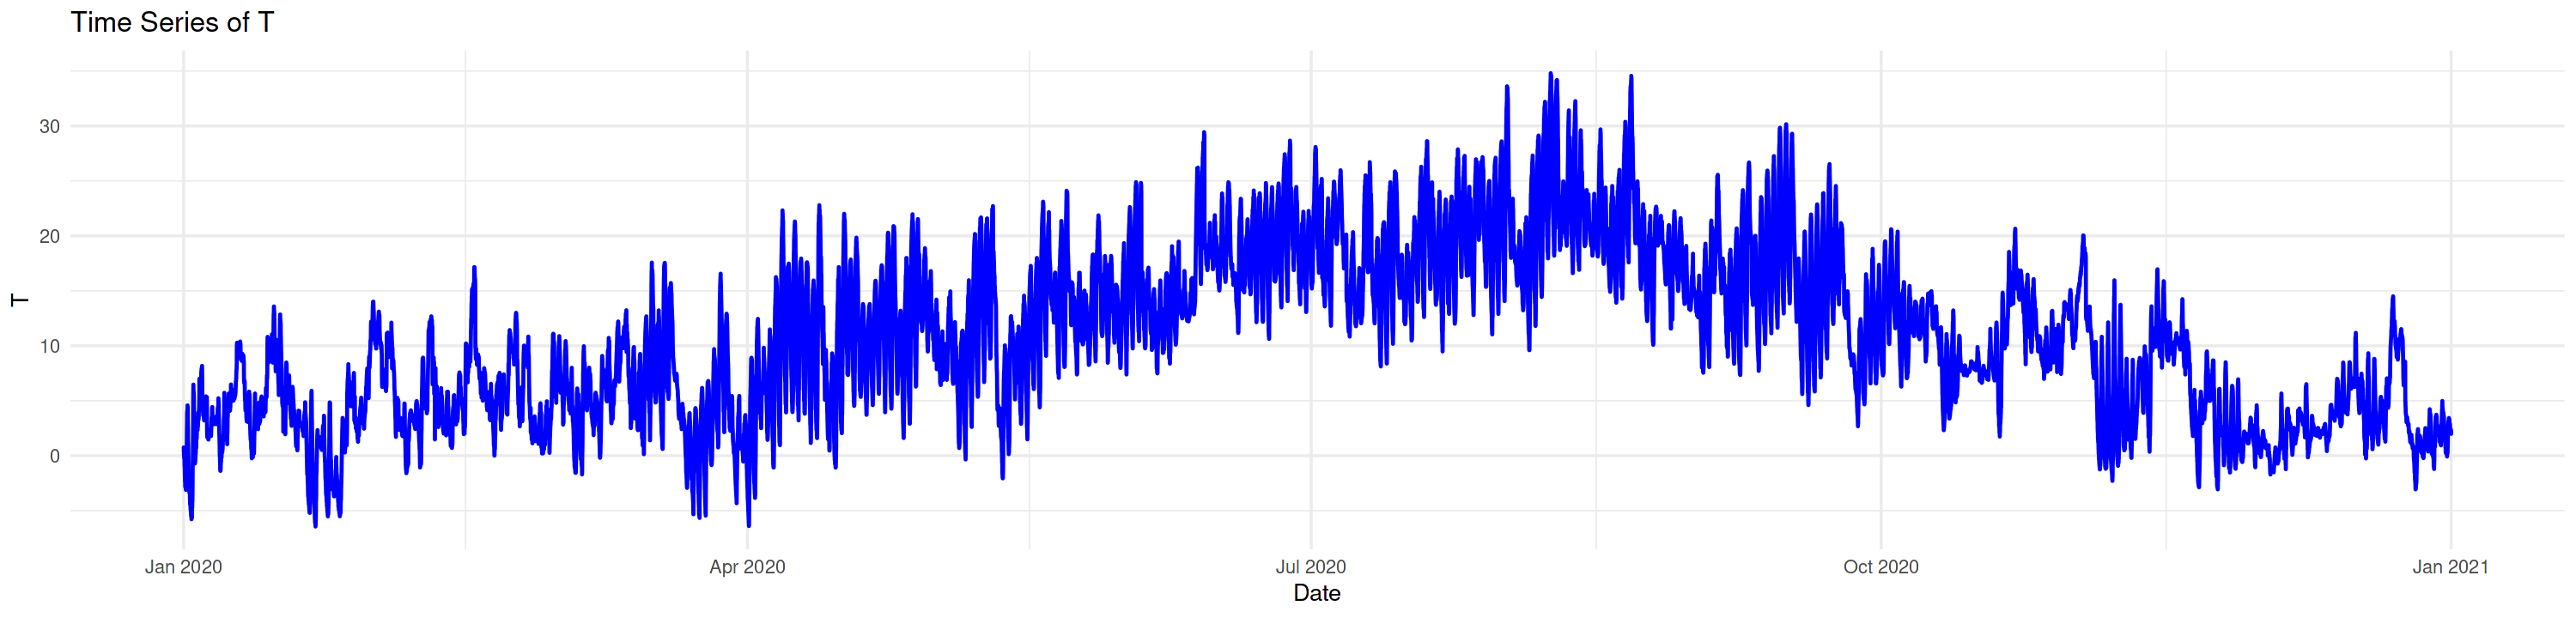

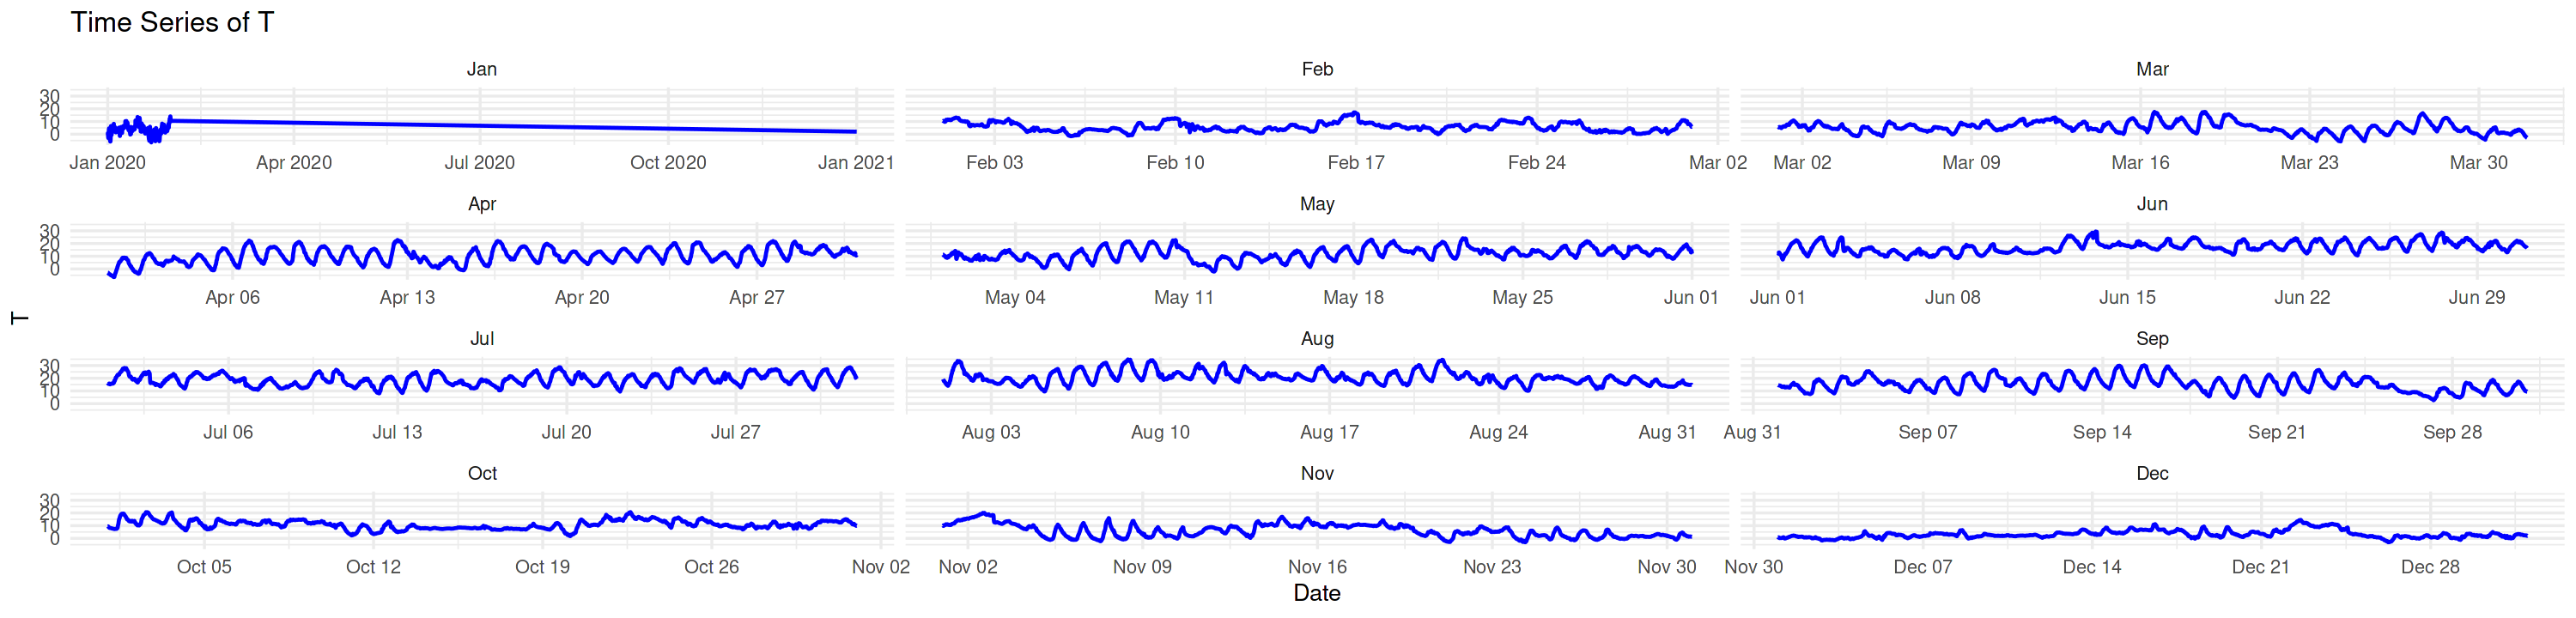

In [12]:
plot_time_series <- function(df, var, title, y_label) {

  if (!is.numeric(df[[var]])) {
    message(paste("Skipping", var, "because it is not numeric."))
    return(NULL)
  }
  
  # Main plot
  p <- ggplot(df, aes(x = date, y = .data[[var]])) +
    geom_line(color = "blue", linewidth = 1) +   # thicker line
    labs(title = title, x = "Date", y = y_label) +
    theme_minimal(base_size = 16)                # larger font for readability
  
  # Faceted plot by month
  p_faceted <- p + facet_wrap(~month, scales = "free_x", ncol = 3)
  
  # Return both plots
  list(full = p, faceted = p_faceted)
}

# Example usage
var <- "T"
plots <- plot_time_series(df, var, title = paste("Time Series of", var), y_label = var)
options(repr.plot.width=25,repr.plot.height=6)

if (!is.null(plots)) {
  print(plots$full)
  print(plots$faceted)
}


<div style="text-align:center; border-radius:25px 80px; padding:9px; color:#f0f0f0; margin:0; font-size:300%; font-family:Pacifico; background-color:#2e7d32; overflow:hidden">
<b>Boxplot of Variables by Month</b>
</div>

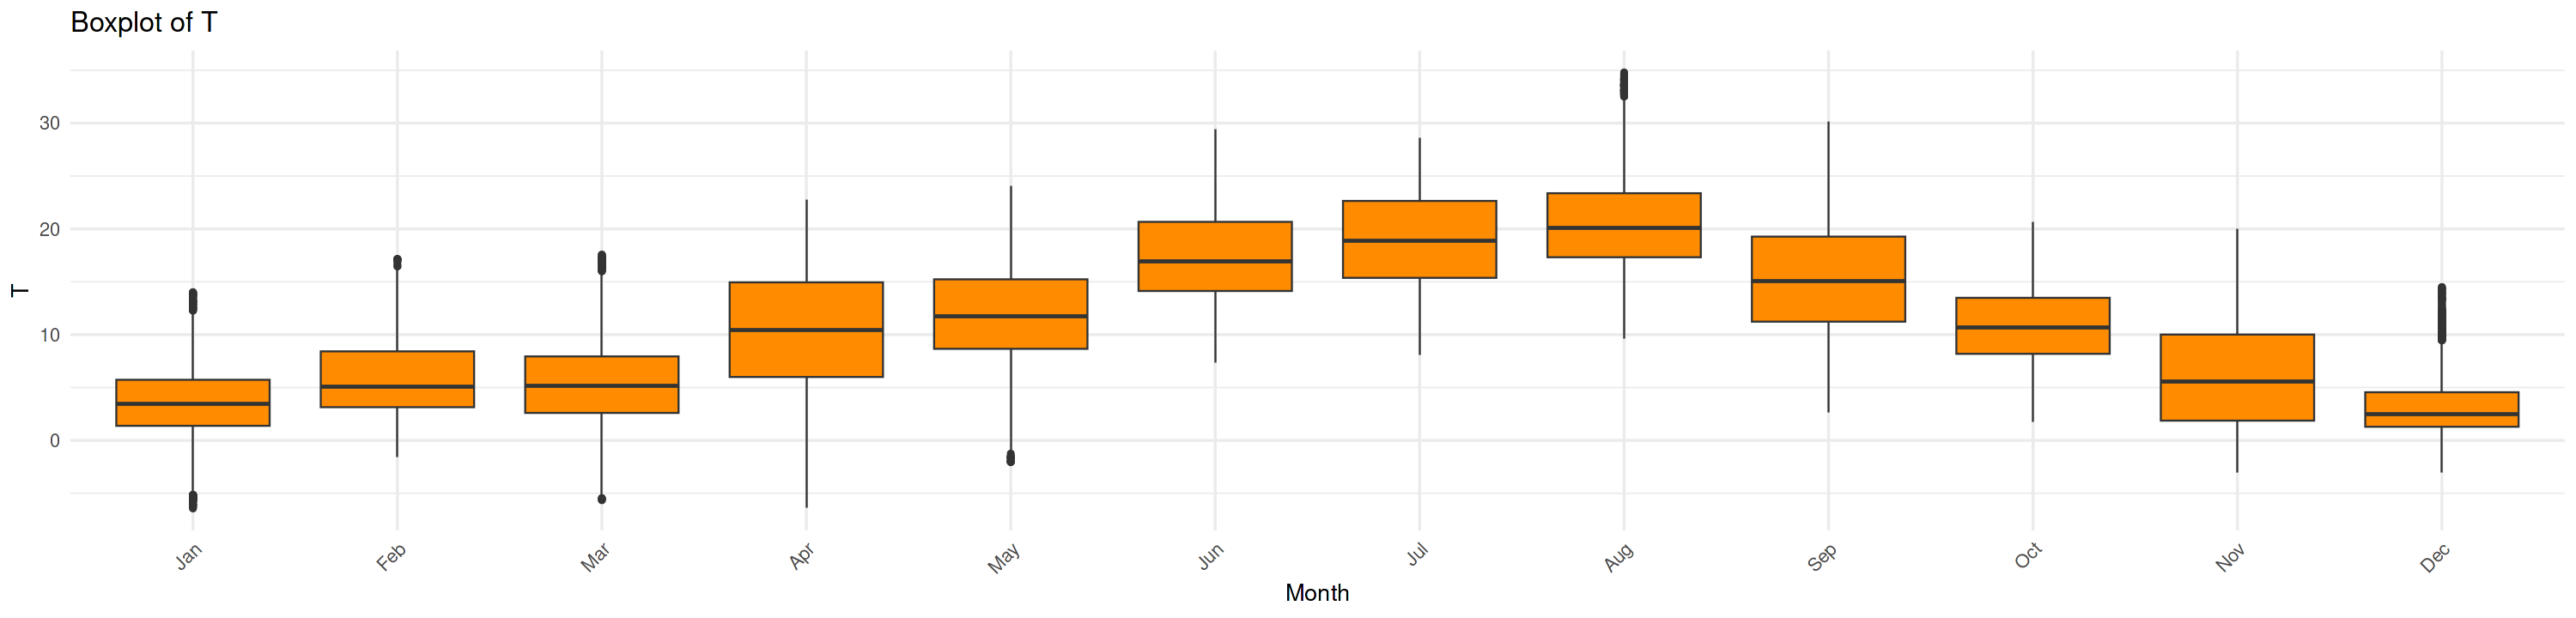

In [13]:
plot_boxplot <- function(df, var) {
  if (!is.numeric(df[[var]])) return(NULL) 
  
  ggplot(df, aes(x = month, y = .data[[var]])) +
    geom_boxplot(fill = "darkorange") +
    labs(title = paste("Boxplot of", var), x = "Month", y = var) +
    theme_minimal(base_size = 16) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
}


plot_boxplot(df, "T")

<div style="text-align:center; border-radius:25px 80px; padding:9px; color:#f0f0f0; margin:0; font-size:300%; font-family:Pacifico; background-color:#2e7d32; overflow:hidden">
<b>Histogram for a Single Variable</b>
</div>

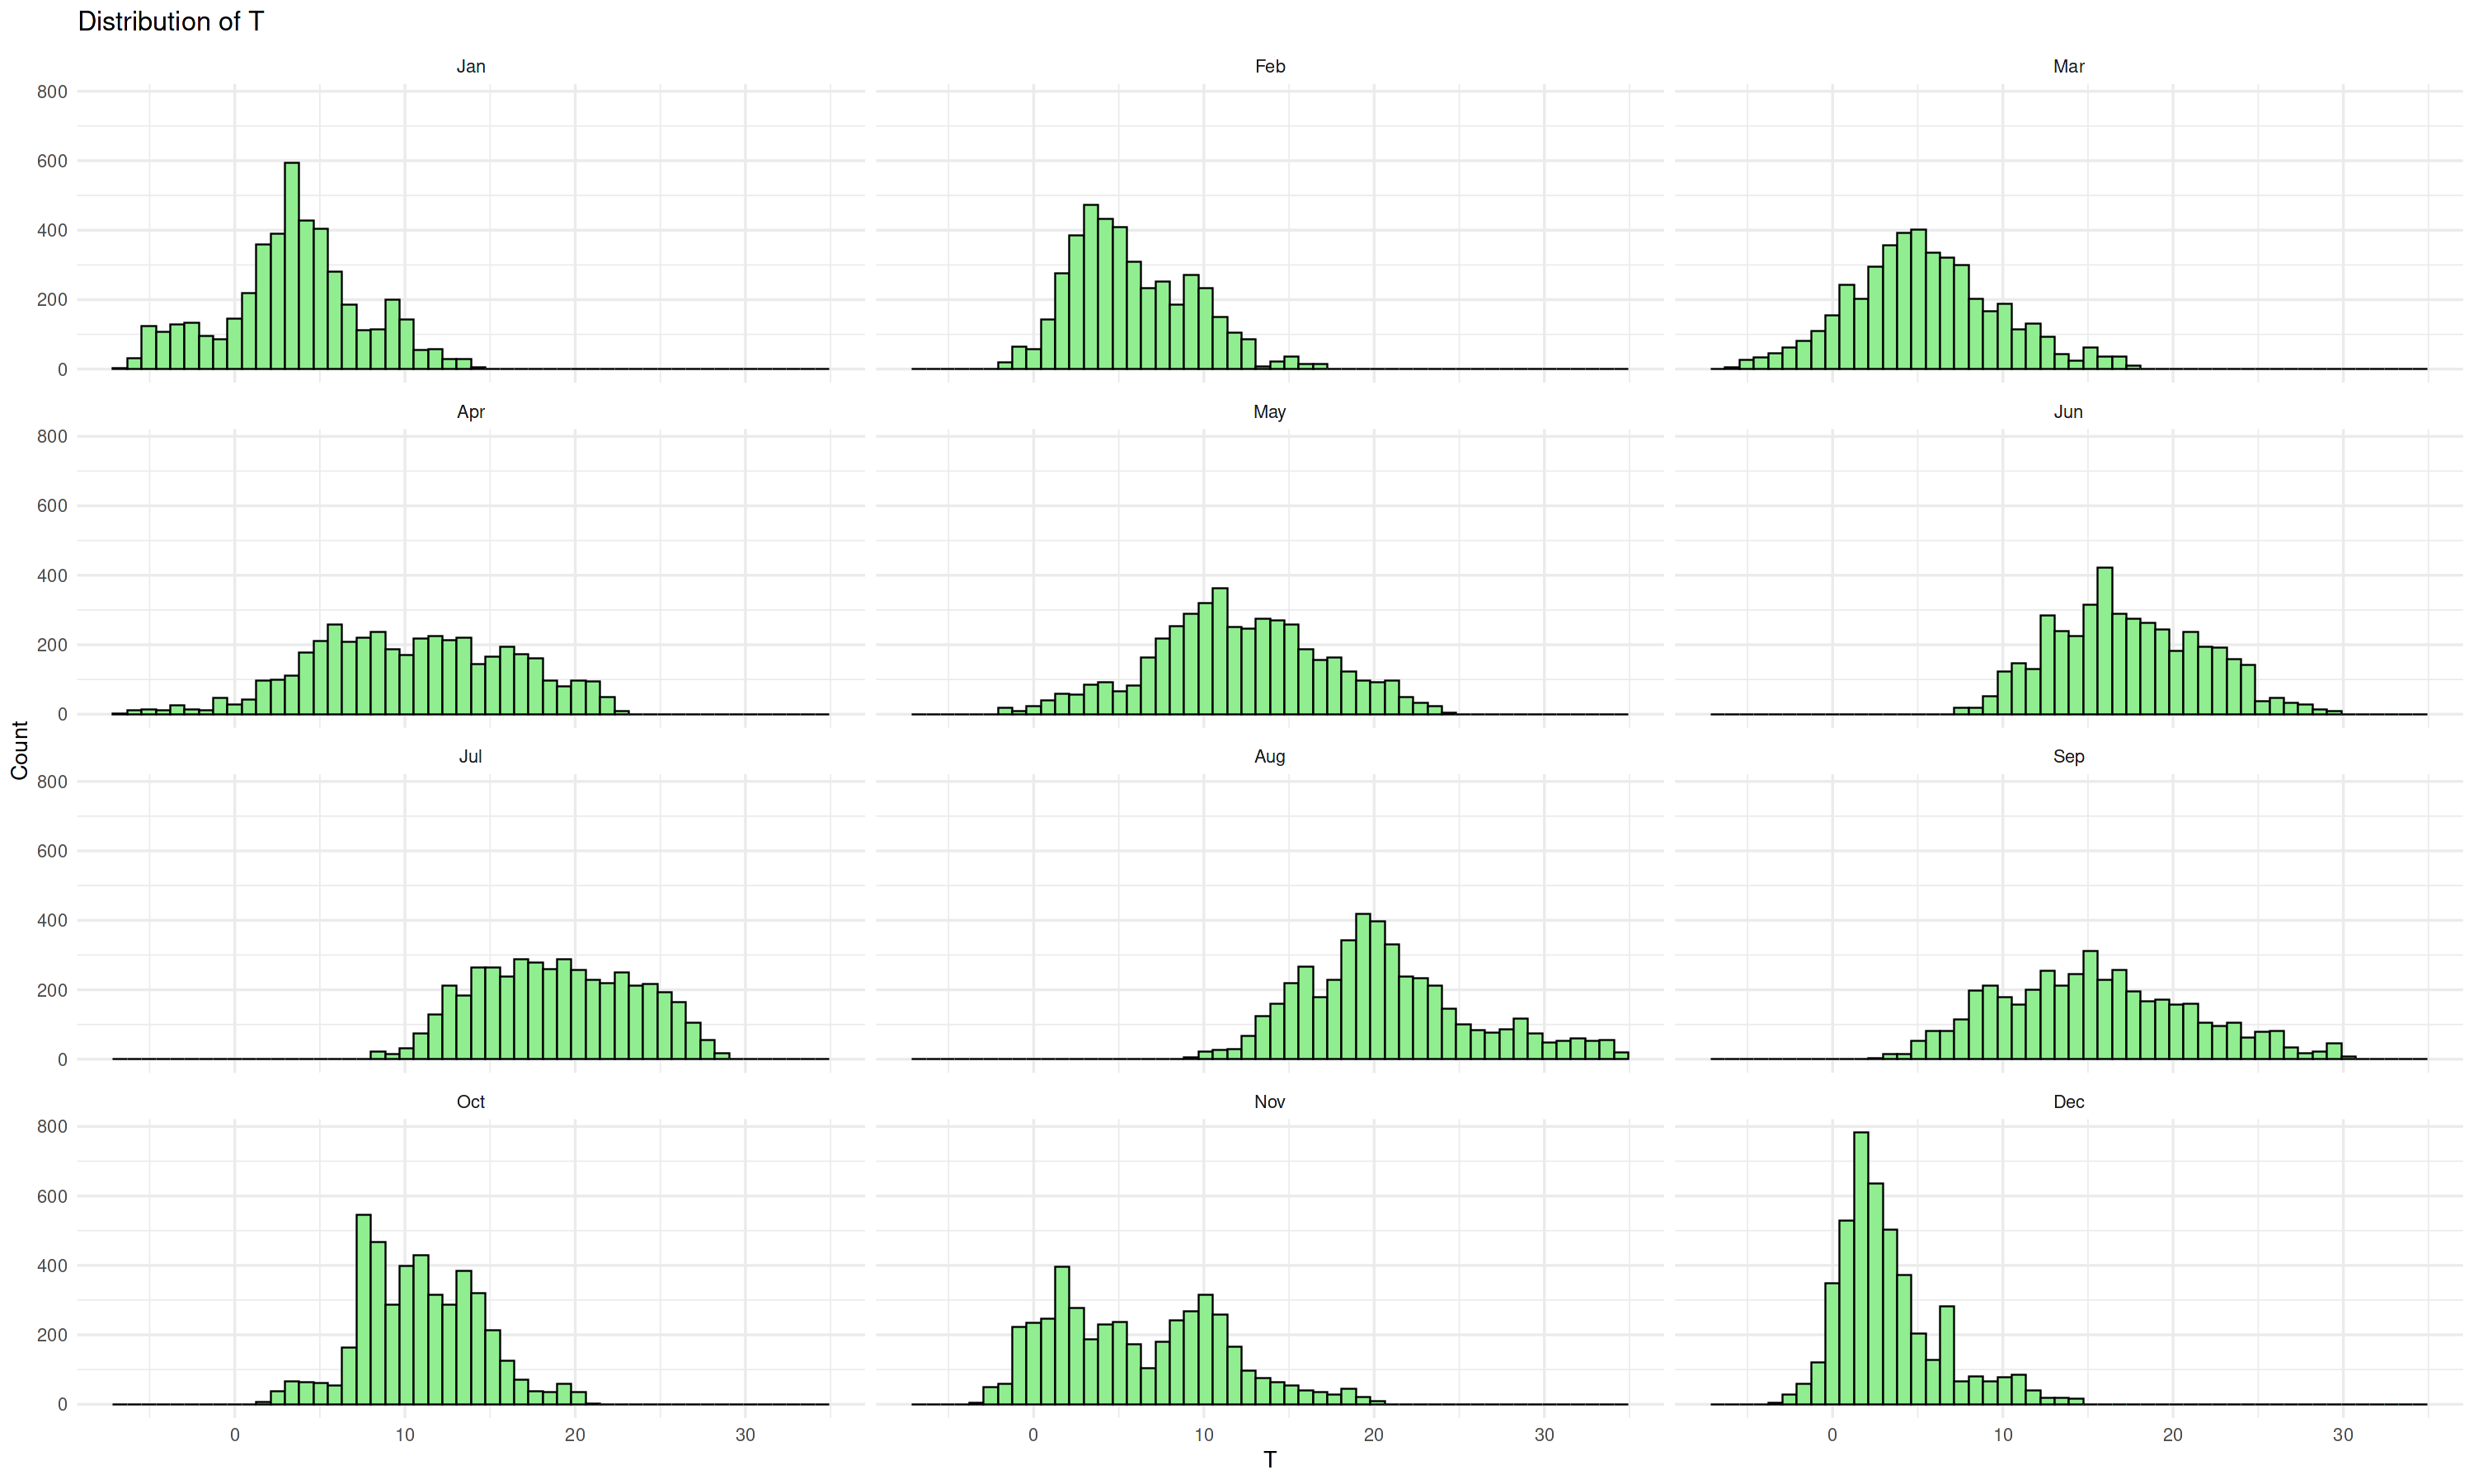

In [14]:
plot_histogram <- function(df, var) {
  if (!is.numeric(df[[var]])) return(NULL)  # Skip non-numeric variables
  
  ggplot(df, aes(x = .data[[var]])) +
    geom_histogram(bins = 50, fill = "lightgreen", color = "black") +
    facet_wrap(~month, ncol = 3) +
    labs(title = paste("Distribution of", var), x = var, y = "Count") +
    theme_minimal(base_size = 16)
}
options(repr.plot.width=25,repr.plot.height=15)
plot_histogram(df, "T")


|Method |    |Description|
|------|------|--------------------------------------------------------------------------|
|circle|     |Circles with size and color representing correlation strength (default)|
|square |     |Squares colored by correlation|
|color |     |Colored rectangles (gradient from negative to positive)|
|number|     |Just numbers showing the correlation values|
|shade |     |Shaded squares with color and angle representing correlation|
|ellipse|    |Ellipses where shape and orientation show correlation|
|pie   |     |Pie charts inside the squares to indicate correlation|


<div style="text-align:center; border-radius:25px 80px; padding:9px; color:#f0f0f0; margin:0; font-size:300%; font-family:Pacifico; background-color:#2e7d32; overflow:hidden">
<b>Correlation Matrix</b>
</div>

Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
“"tl.cx" is not a graphical parameter”
Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
“"tl.cx" is not a graphical parameter”
Warning message in title(title, ...):
“"tl.cx" is not a graphical parameter”


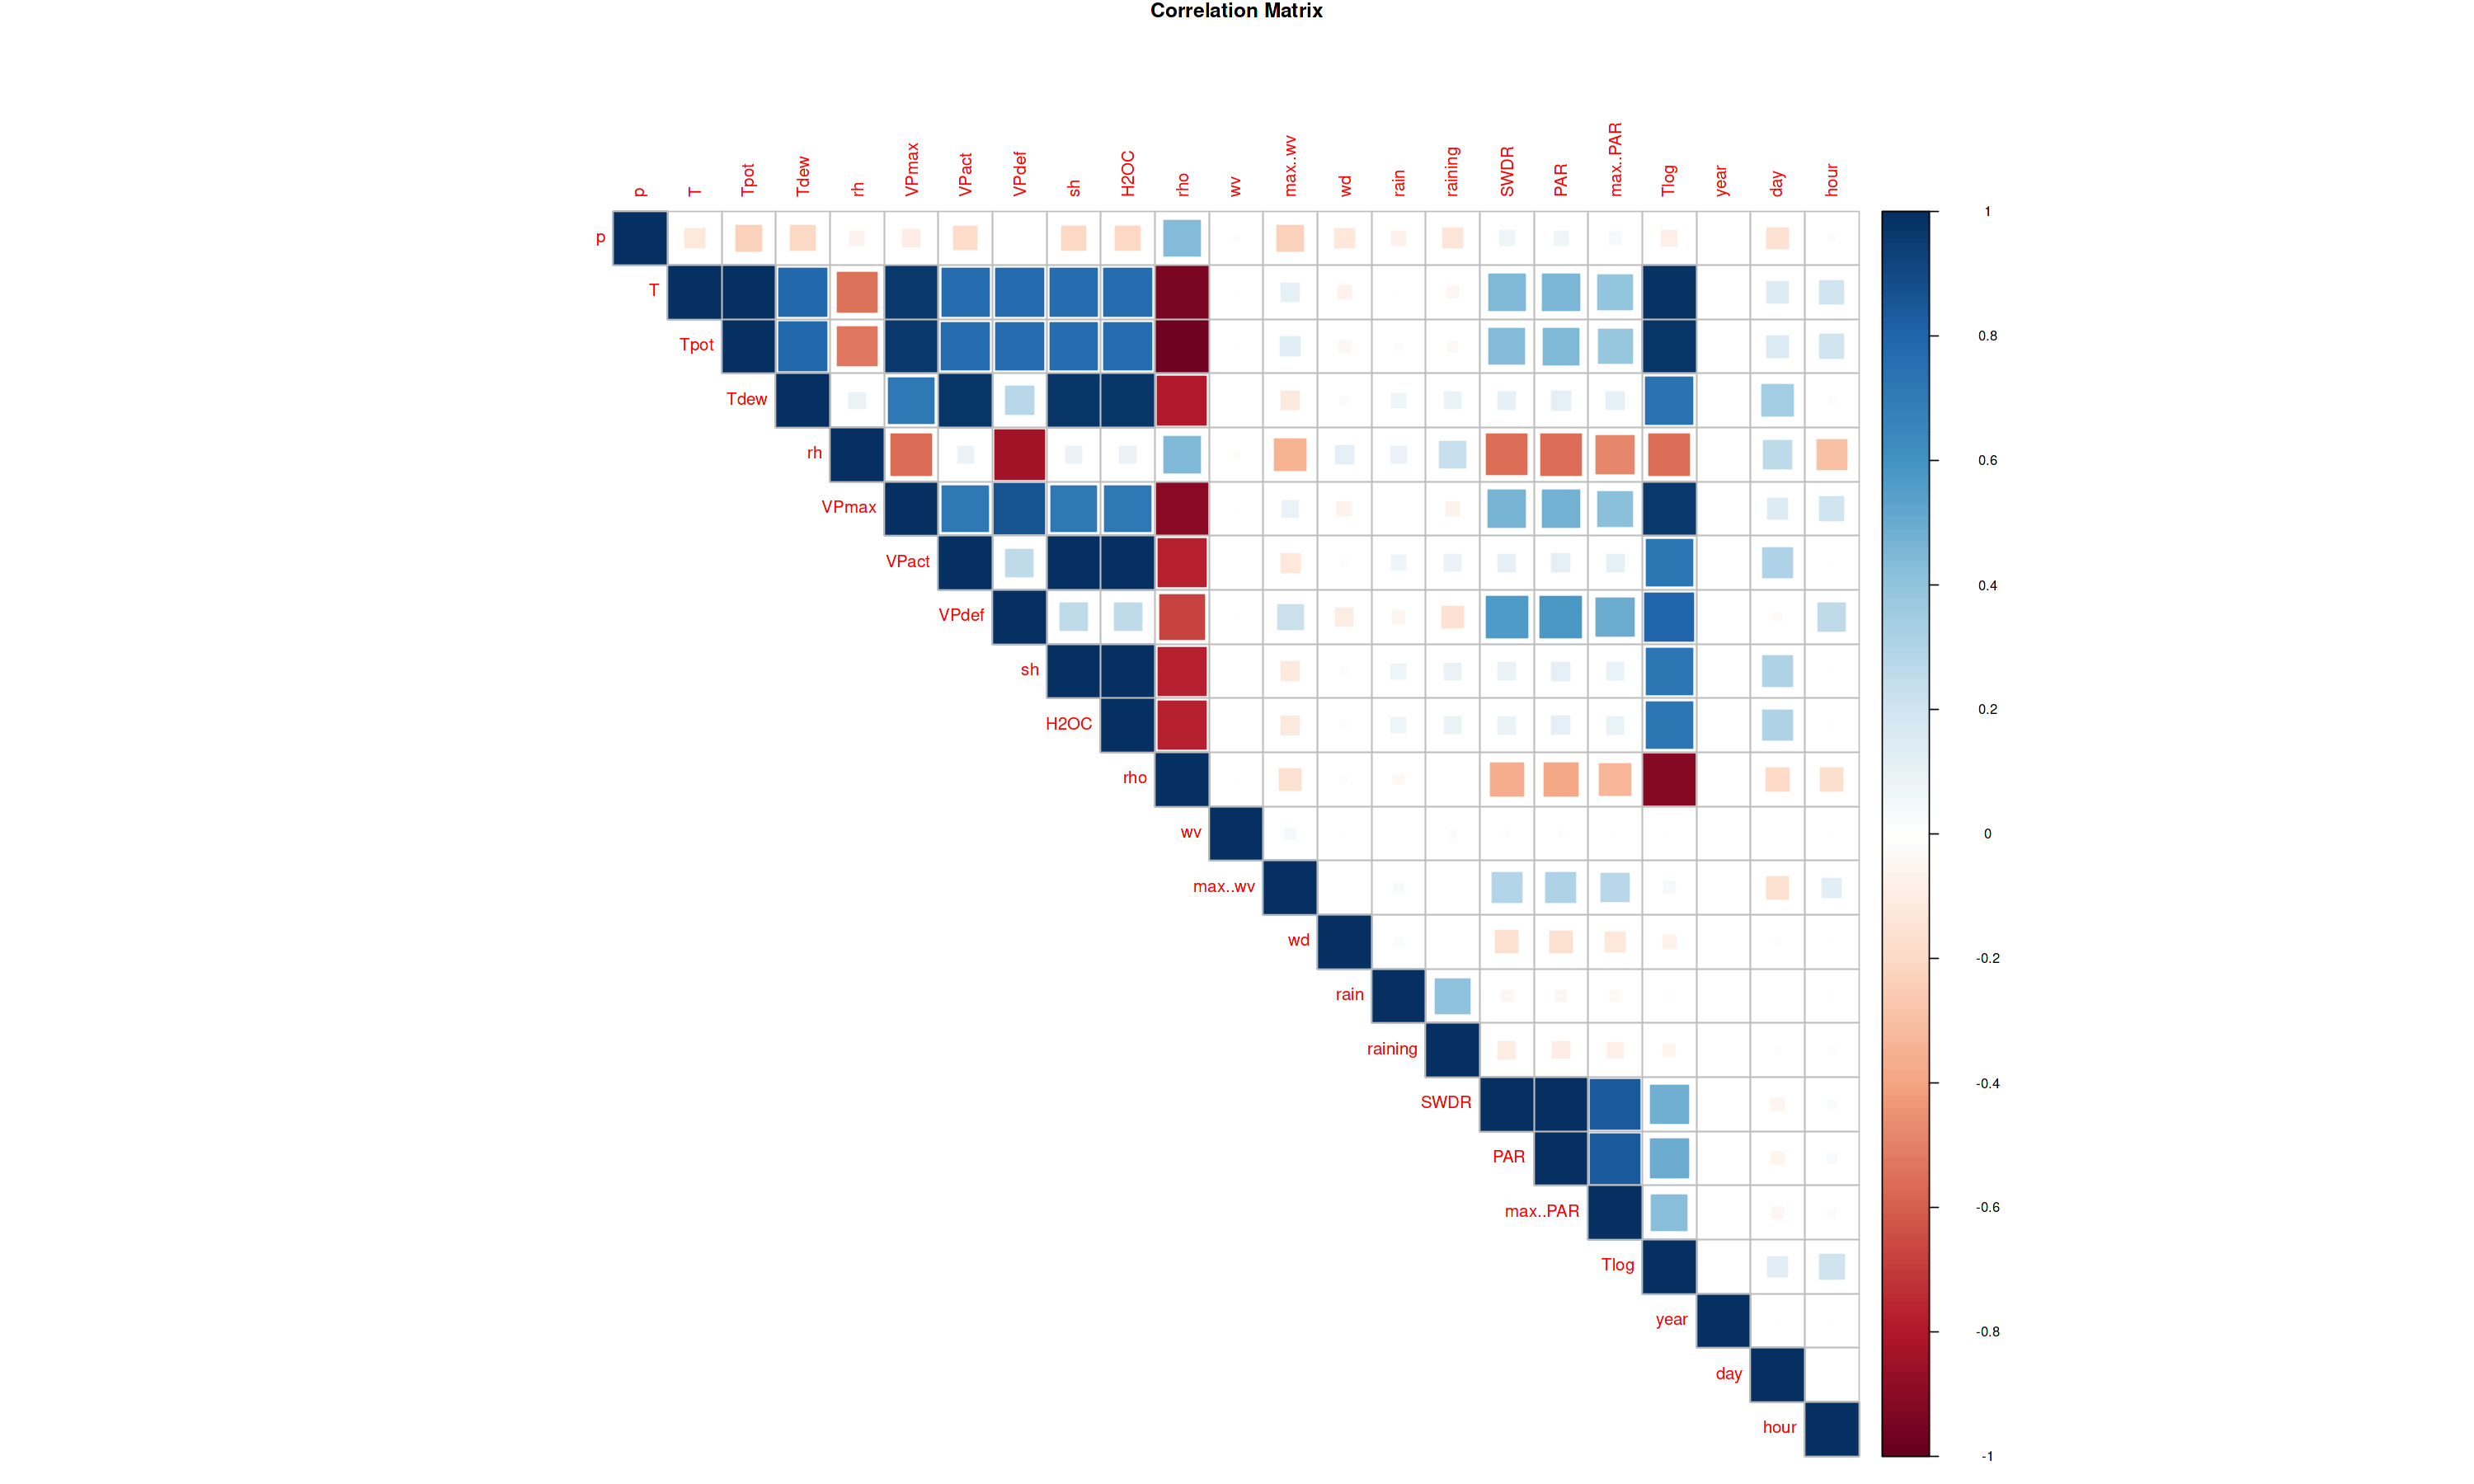

In [15]:
numeric_col<-df%>%select_if(is.numeric)
cor<-cor(numeric_col,use="complete.obs")
corrplot(cor,method="square",type="upper",tl.cx=0.7,title="Correlation Matrix",mar=c(0,0,1,0))

Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
“"tl.cx" is not a graphical parameter”
Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
“"tl.cx" is not a graphical parameter”
Warning message in title(title, ...):
“"tl.cx" is not a graphical parameter”


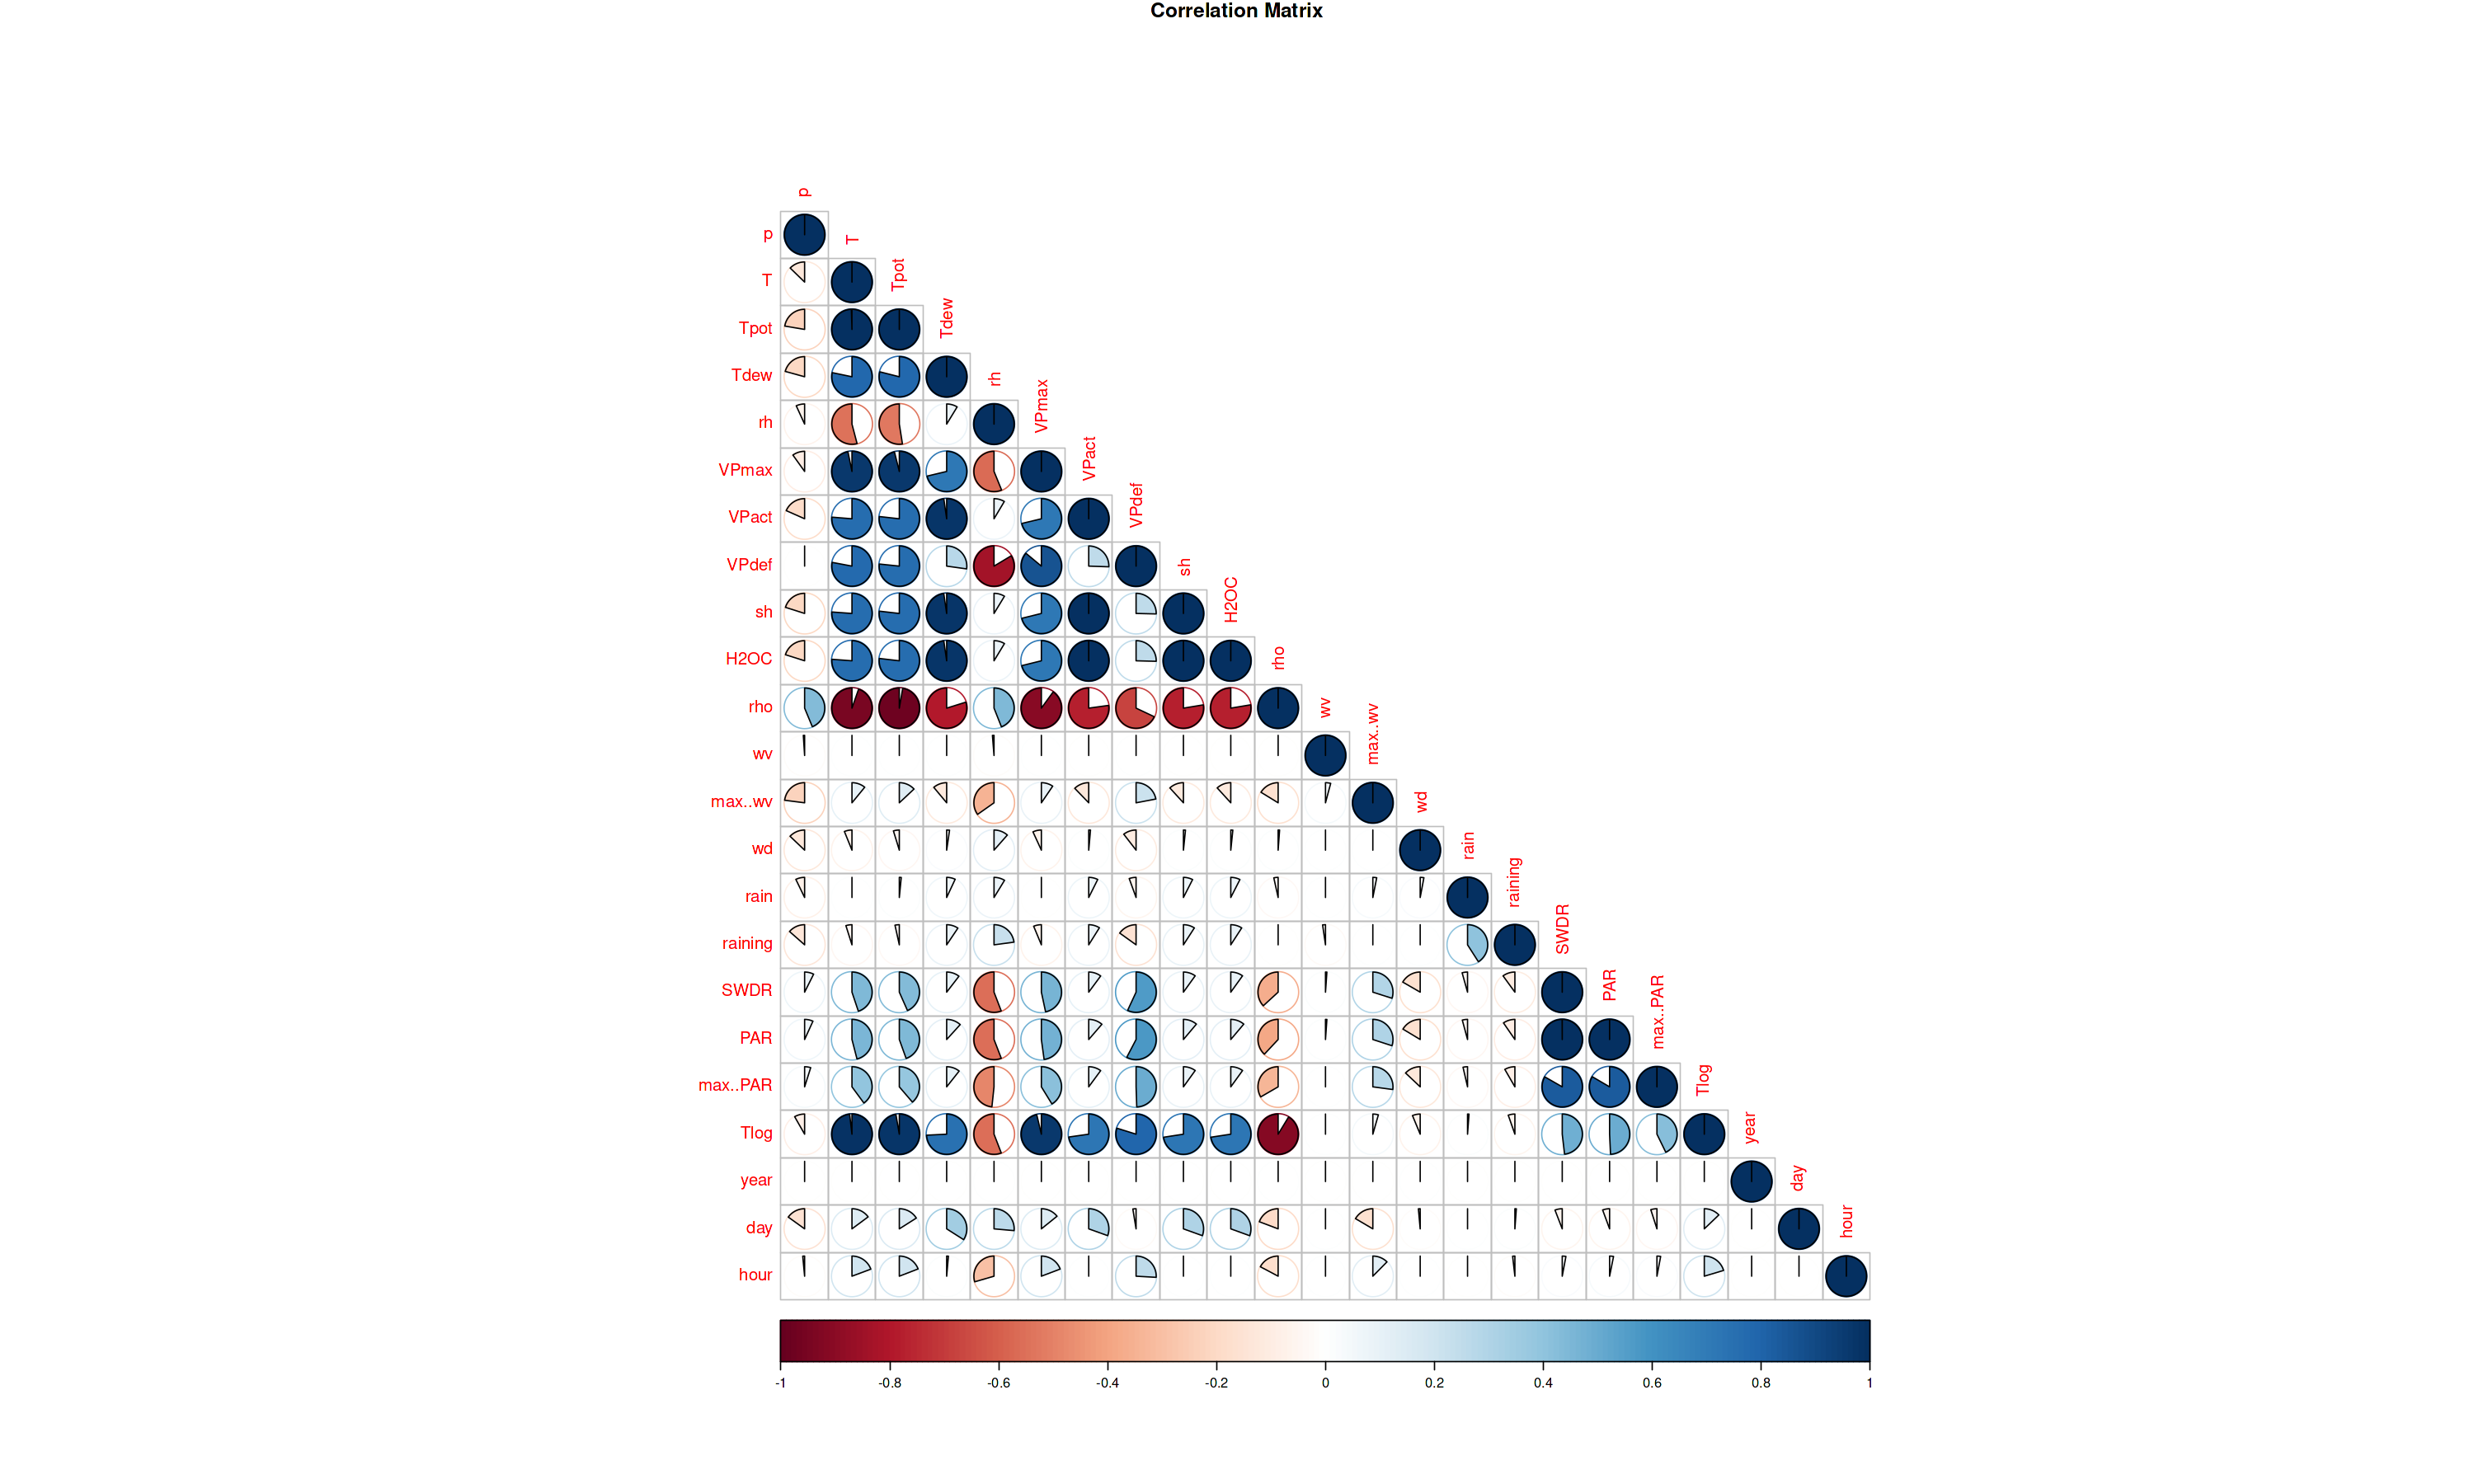

In [16]:
corrplot(cor,method="pie",type="lower",tl.cx=0.7,title="Correlation Matrix",mar=c(0,0,1,0))

Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
“"tl.cx" is not a graphical parameter”
Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
“"tl.cx" is not a graphical parameter”
Warning message in title(title, ...):
“"tl.cx" is not a graphical parameter”


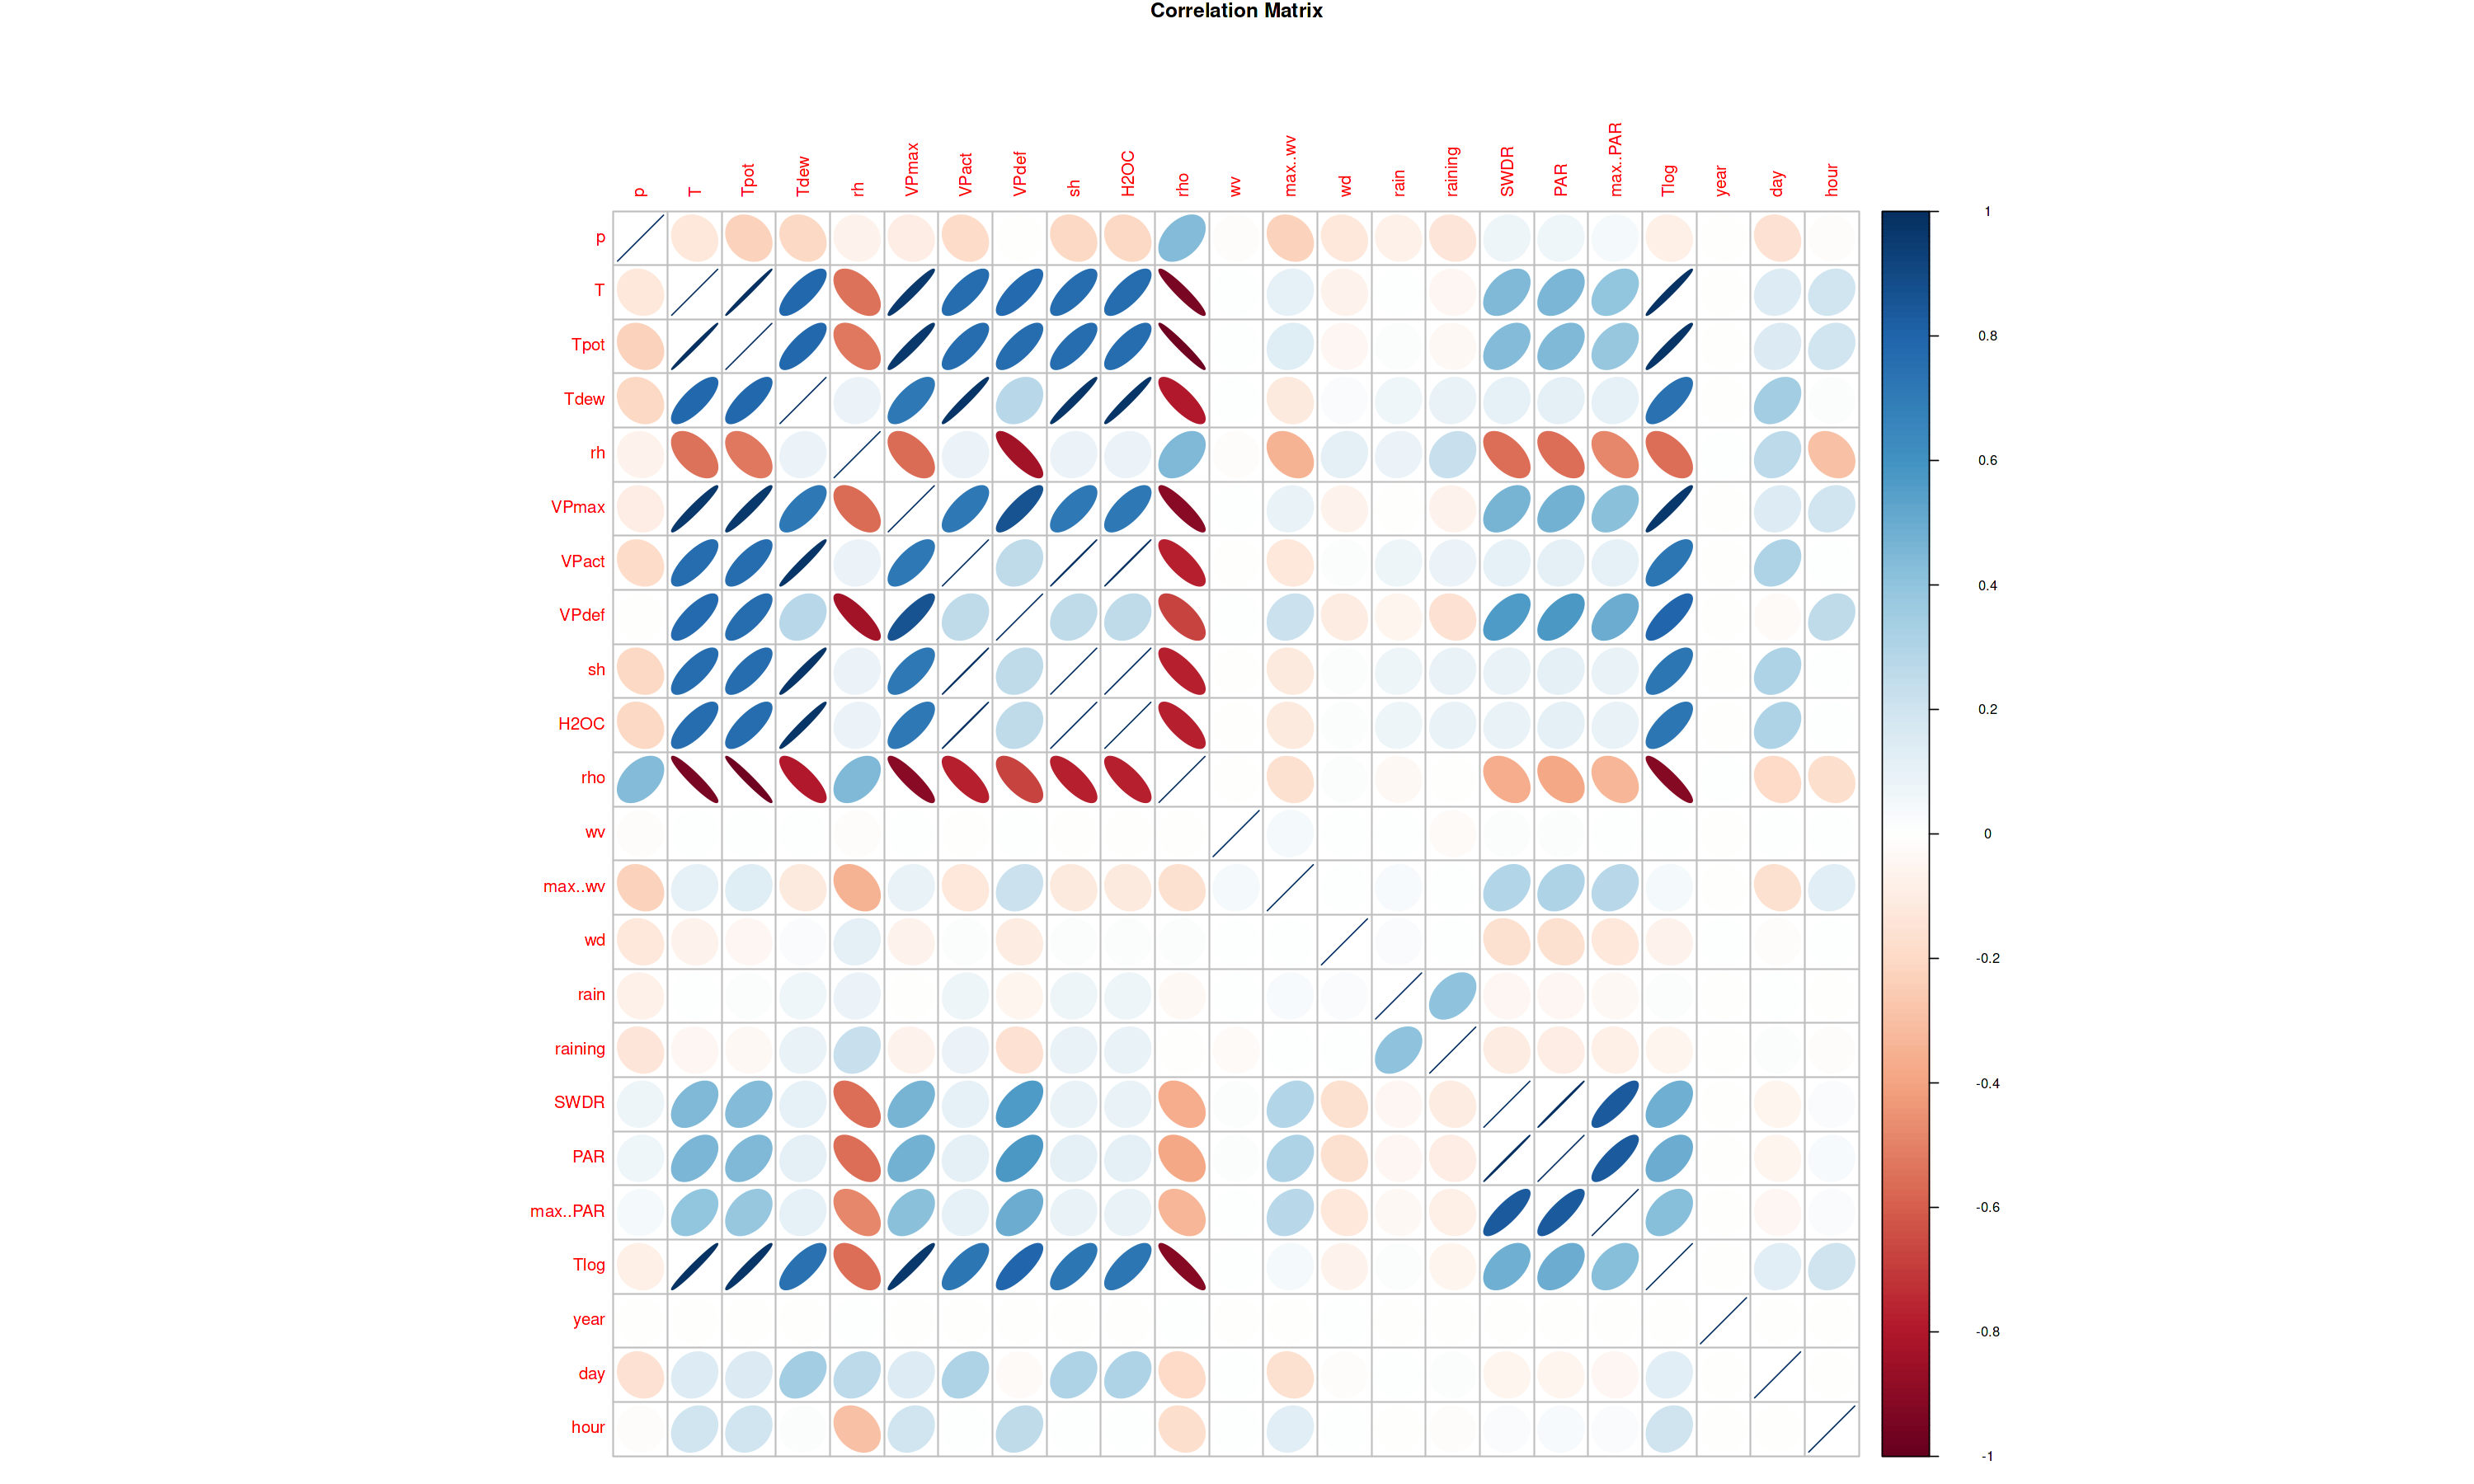

In [17]:
corrplot(cor,method="ellipse",type="full",tl.cx=0.7,title="Correlation Matrix",mar=c(0,0,1,0))

<div style="text-align:center; border-radius:25px 80px; padding:9px; color:#f0f0f0; margin:0; font-size:300%; font-family:Pacifico; background-color:#2e7d32; overflow:hidden">
<b> Heatmap for a Single Variable</b>
</div>

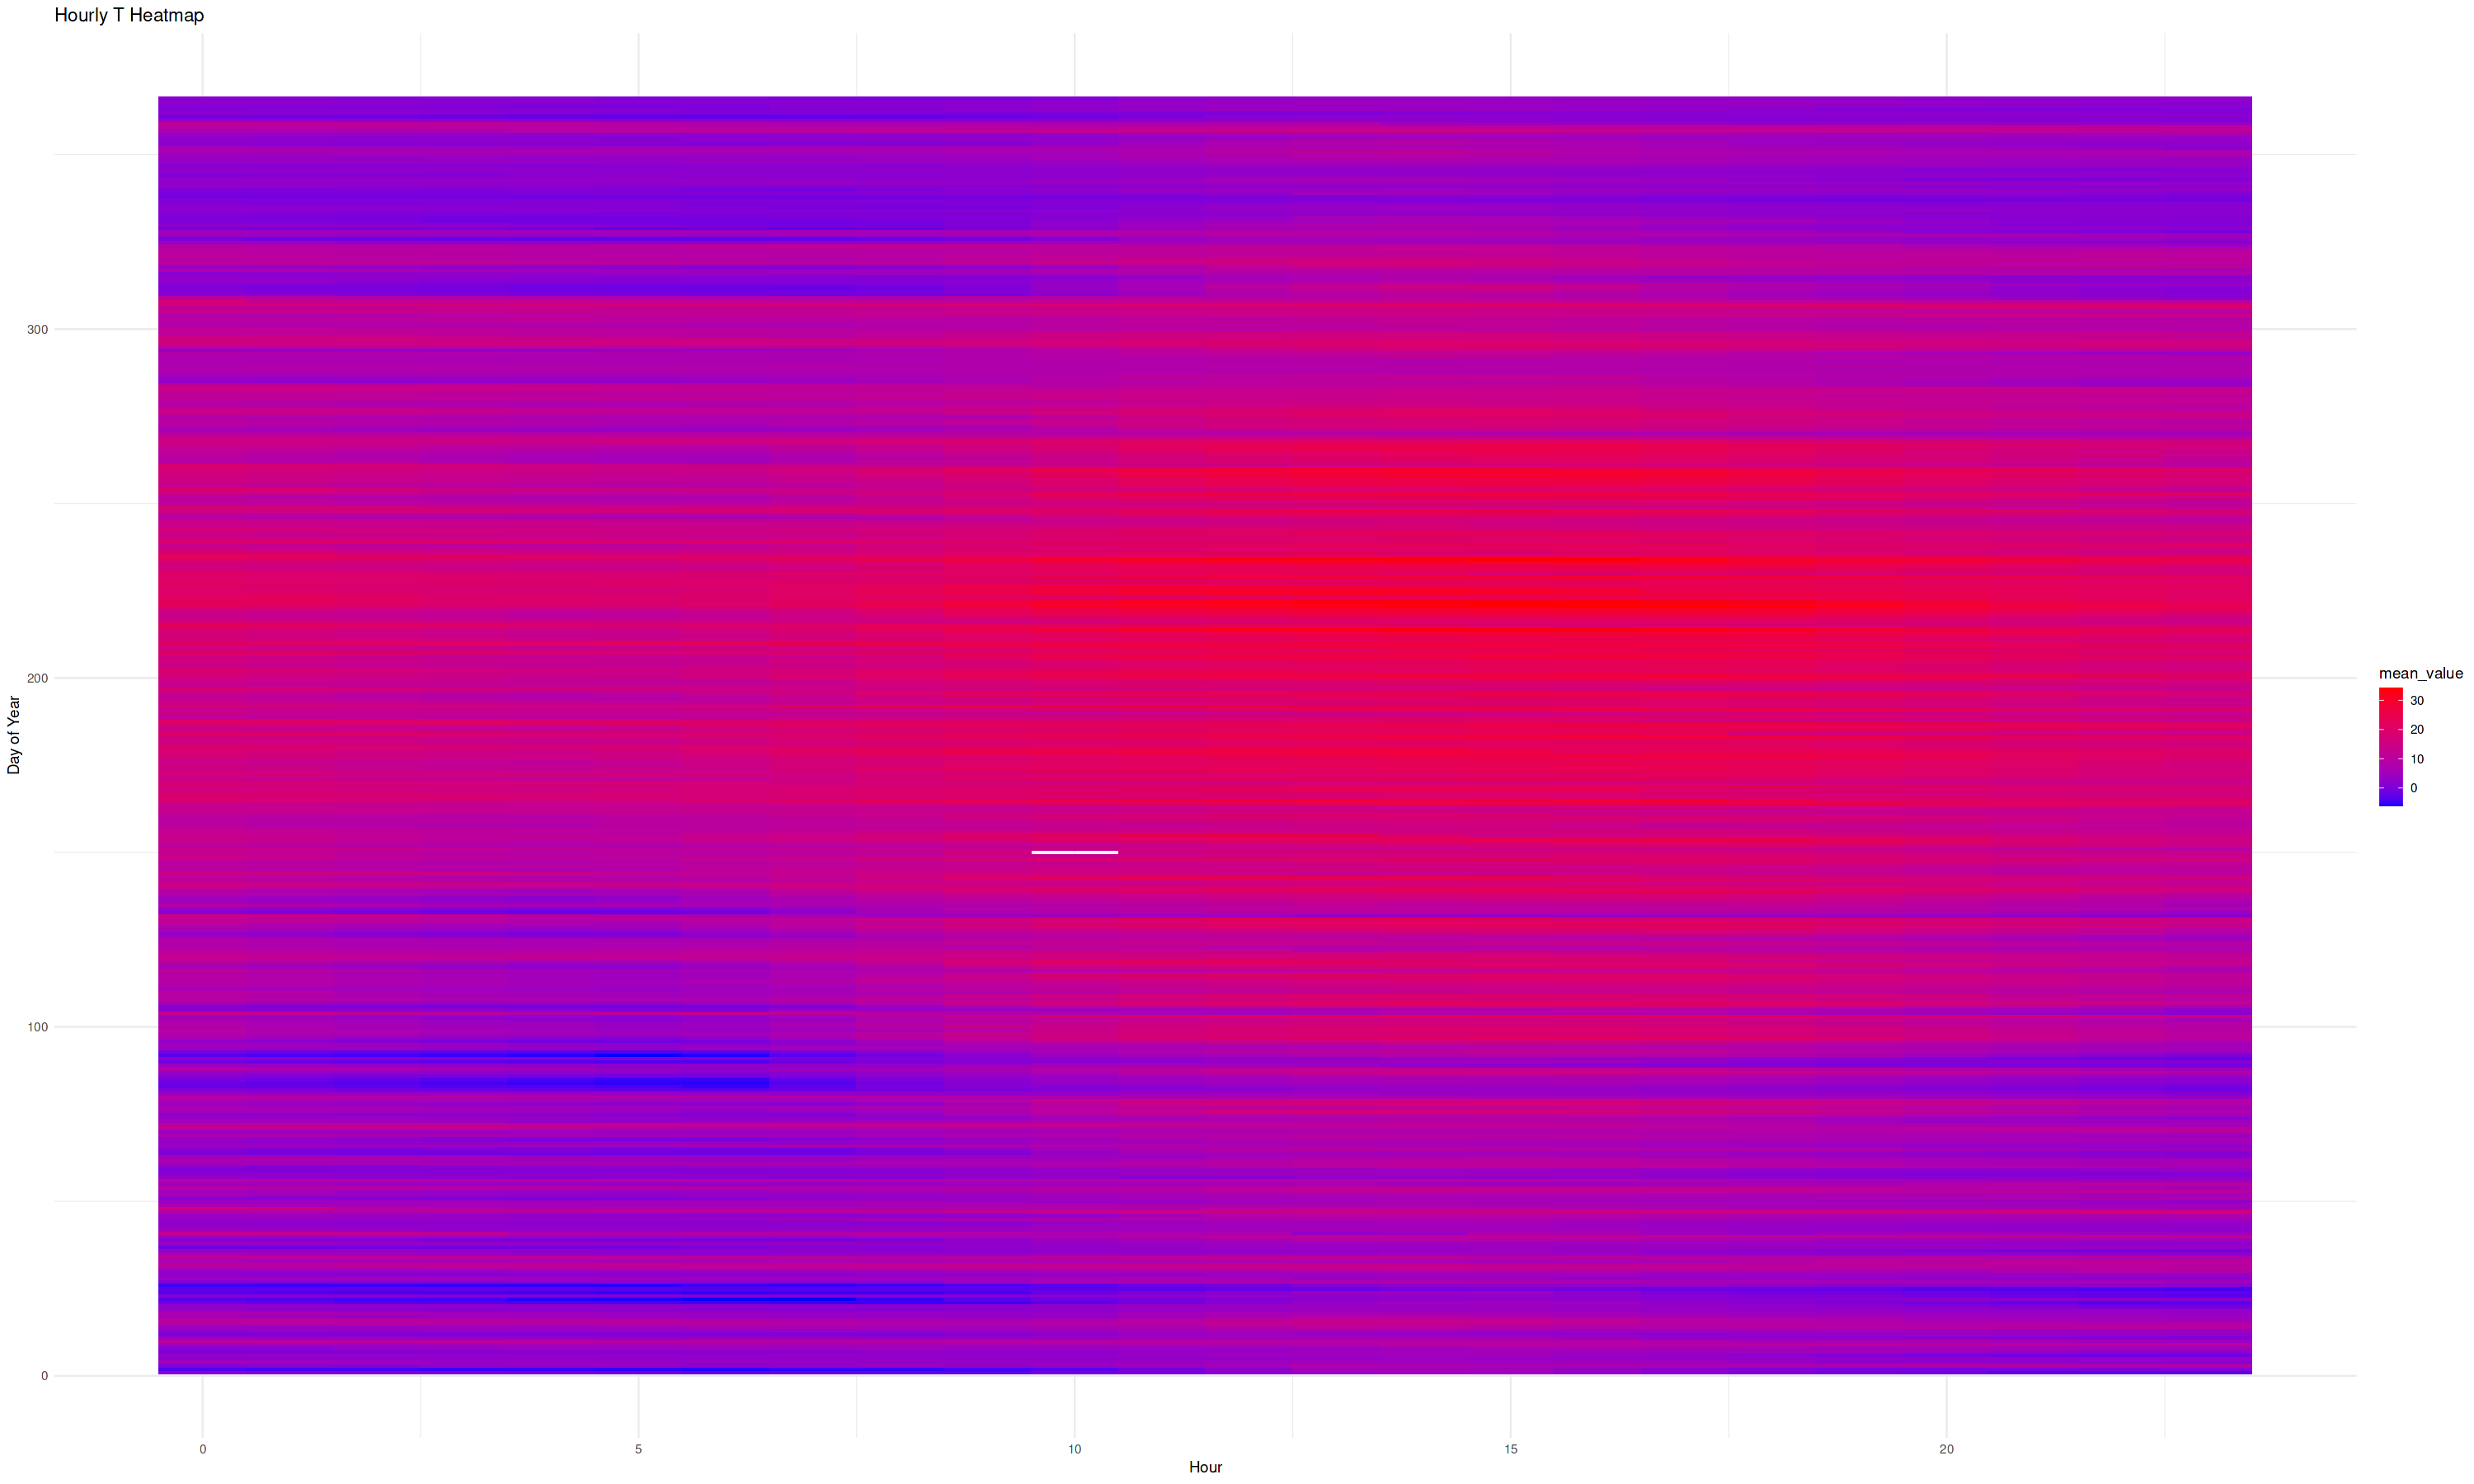

In [18]:
plot_heatmap <- function(df, var) {
  if (!is.numeric(df[[var]])) return(NULL)
  
  heatmap_data <- df %>%
    group_by(day, hour) %>%
    summarise(mean_value = mean(.data[[var]], na.rm = TRUE), .groups = "drop")
  
  ggplot(heatmap_data, aes(x = hour, y = day, fill = mean_value)) +
    geom_tile() +
    scale_fill_gradient(low = "blue", high = "red") +
    labs(title = paste("Hourly", var, "Heatmap"), x = "Hour", y = "Day of Year") +
    theme_minimal()
}

# Example usage
plot_heatmap(df, "T")


<div style="text-align:center; border-radius:25px 80px; padding:9px; color:#f0f0f0; margin:0; font-size:300%; font-family:Pacifico; background-color:#2e7d32; overflow:hidden">
<b>Anomaly Highlight Plot for a Single Variable</b>
</div>

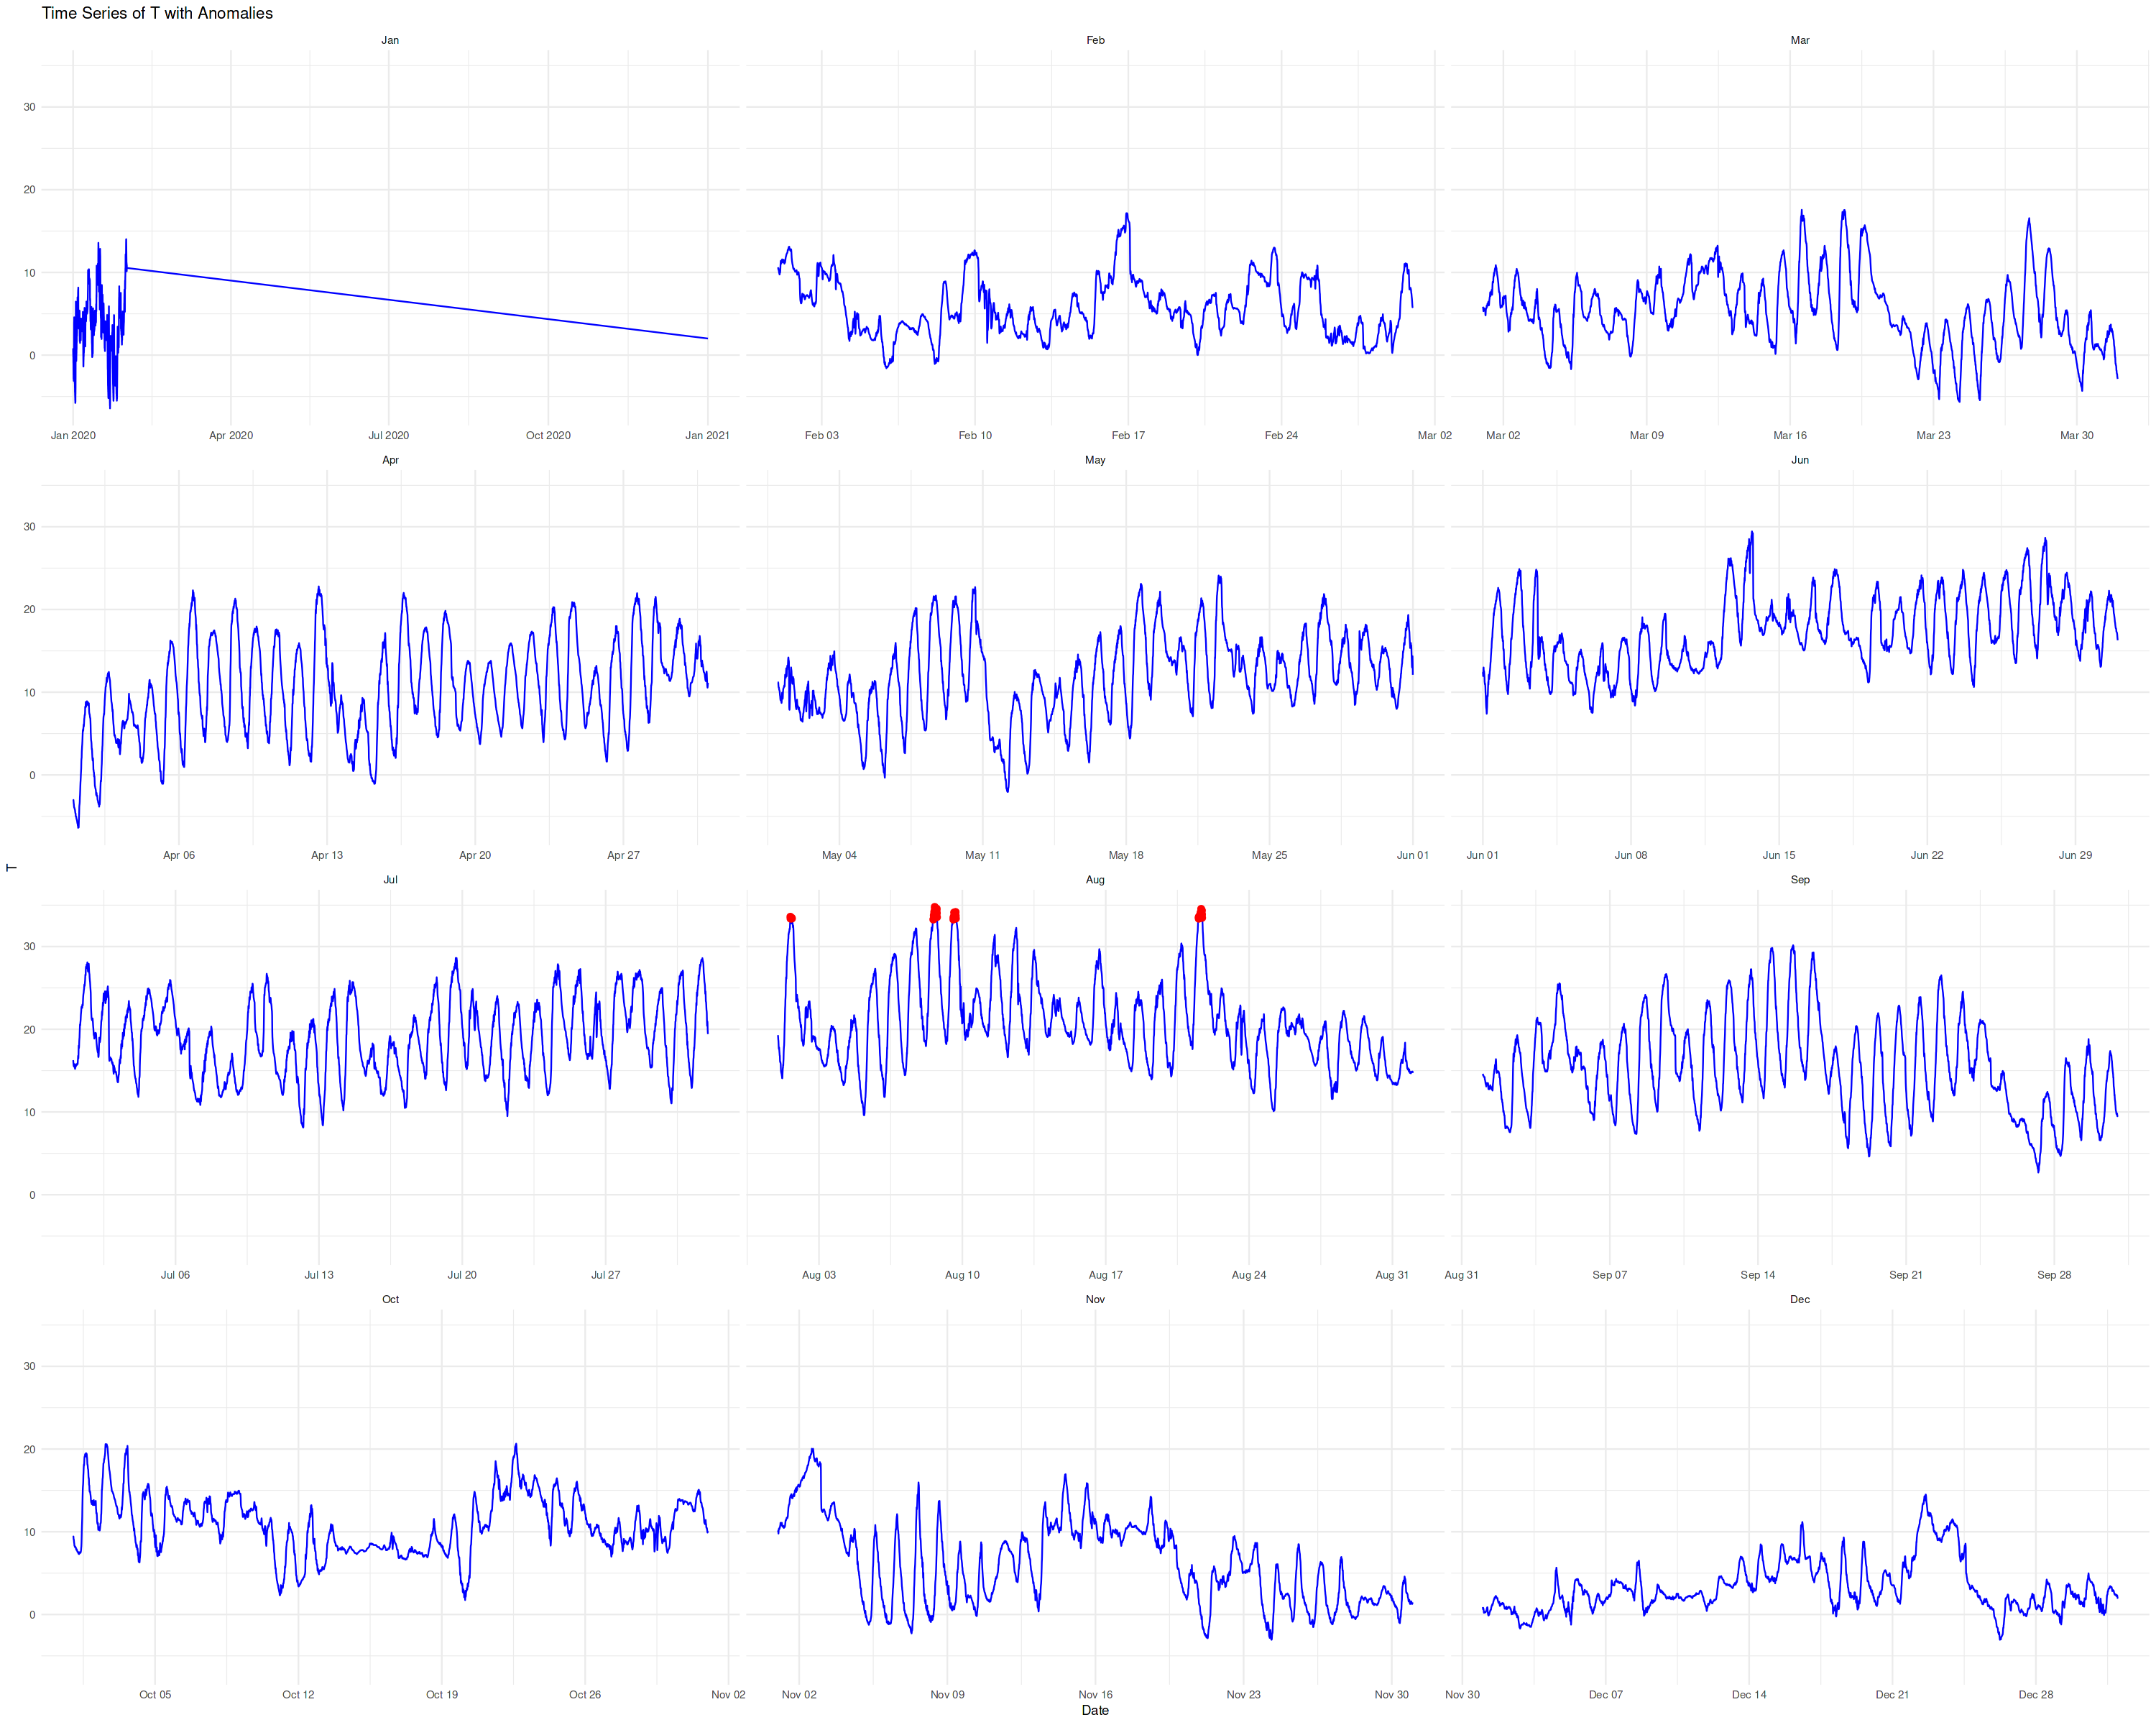

In [19]:
plot_anomaly_highlight <- function(df, var) {
  if (!is.numeric(df[[var]])) return(NULL)
  
  mean_val <- mean(df[[var]], na.rm = TRUE)
  sd_val <- sd(df[[var]], na.rm = TRUE)
  threshold <- 3 * sd_val
  df$anomaly <- abs(df[[var]] - mean_val) > threshold
  
  ggplot(df, aes(x = date, y = .data[[var]])) +
    geom_line(color = "blue", linewidth = 0.5) +
    geom_point(data = df %>% filter(anomaly), aes(y = .data[[var]]), color = "red", size = 2) +
    facet_wrap(~month, scales = "free_x", ncol = 3) +
    labs(title = paste("Time Series of", var, "with Anomalies"), x = "Date", y = var) +
    theme_minimal()
}

options(repr.plot.width=25,repr.plot.height=20)
plot_anomaly_highlight(df, "T")



<div style="text-align:center; border-radius:25px 80px; padding:10px; color:#f0f0f0; font-size:300%; font-family:Pacifico; background-color:#2e7d32; overflow:hidden"> <b>Time Series Anomaly Highlight Plot</b> </div>

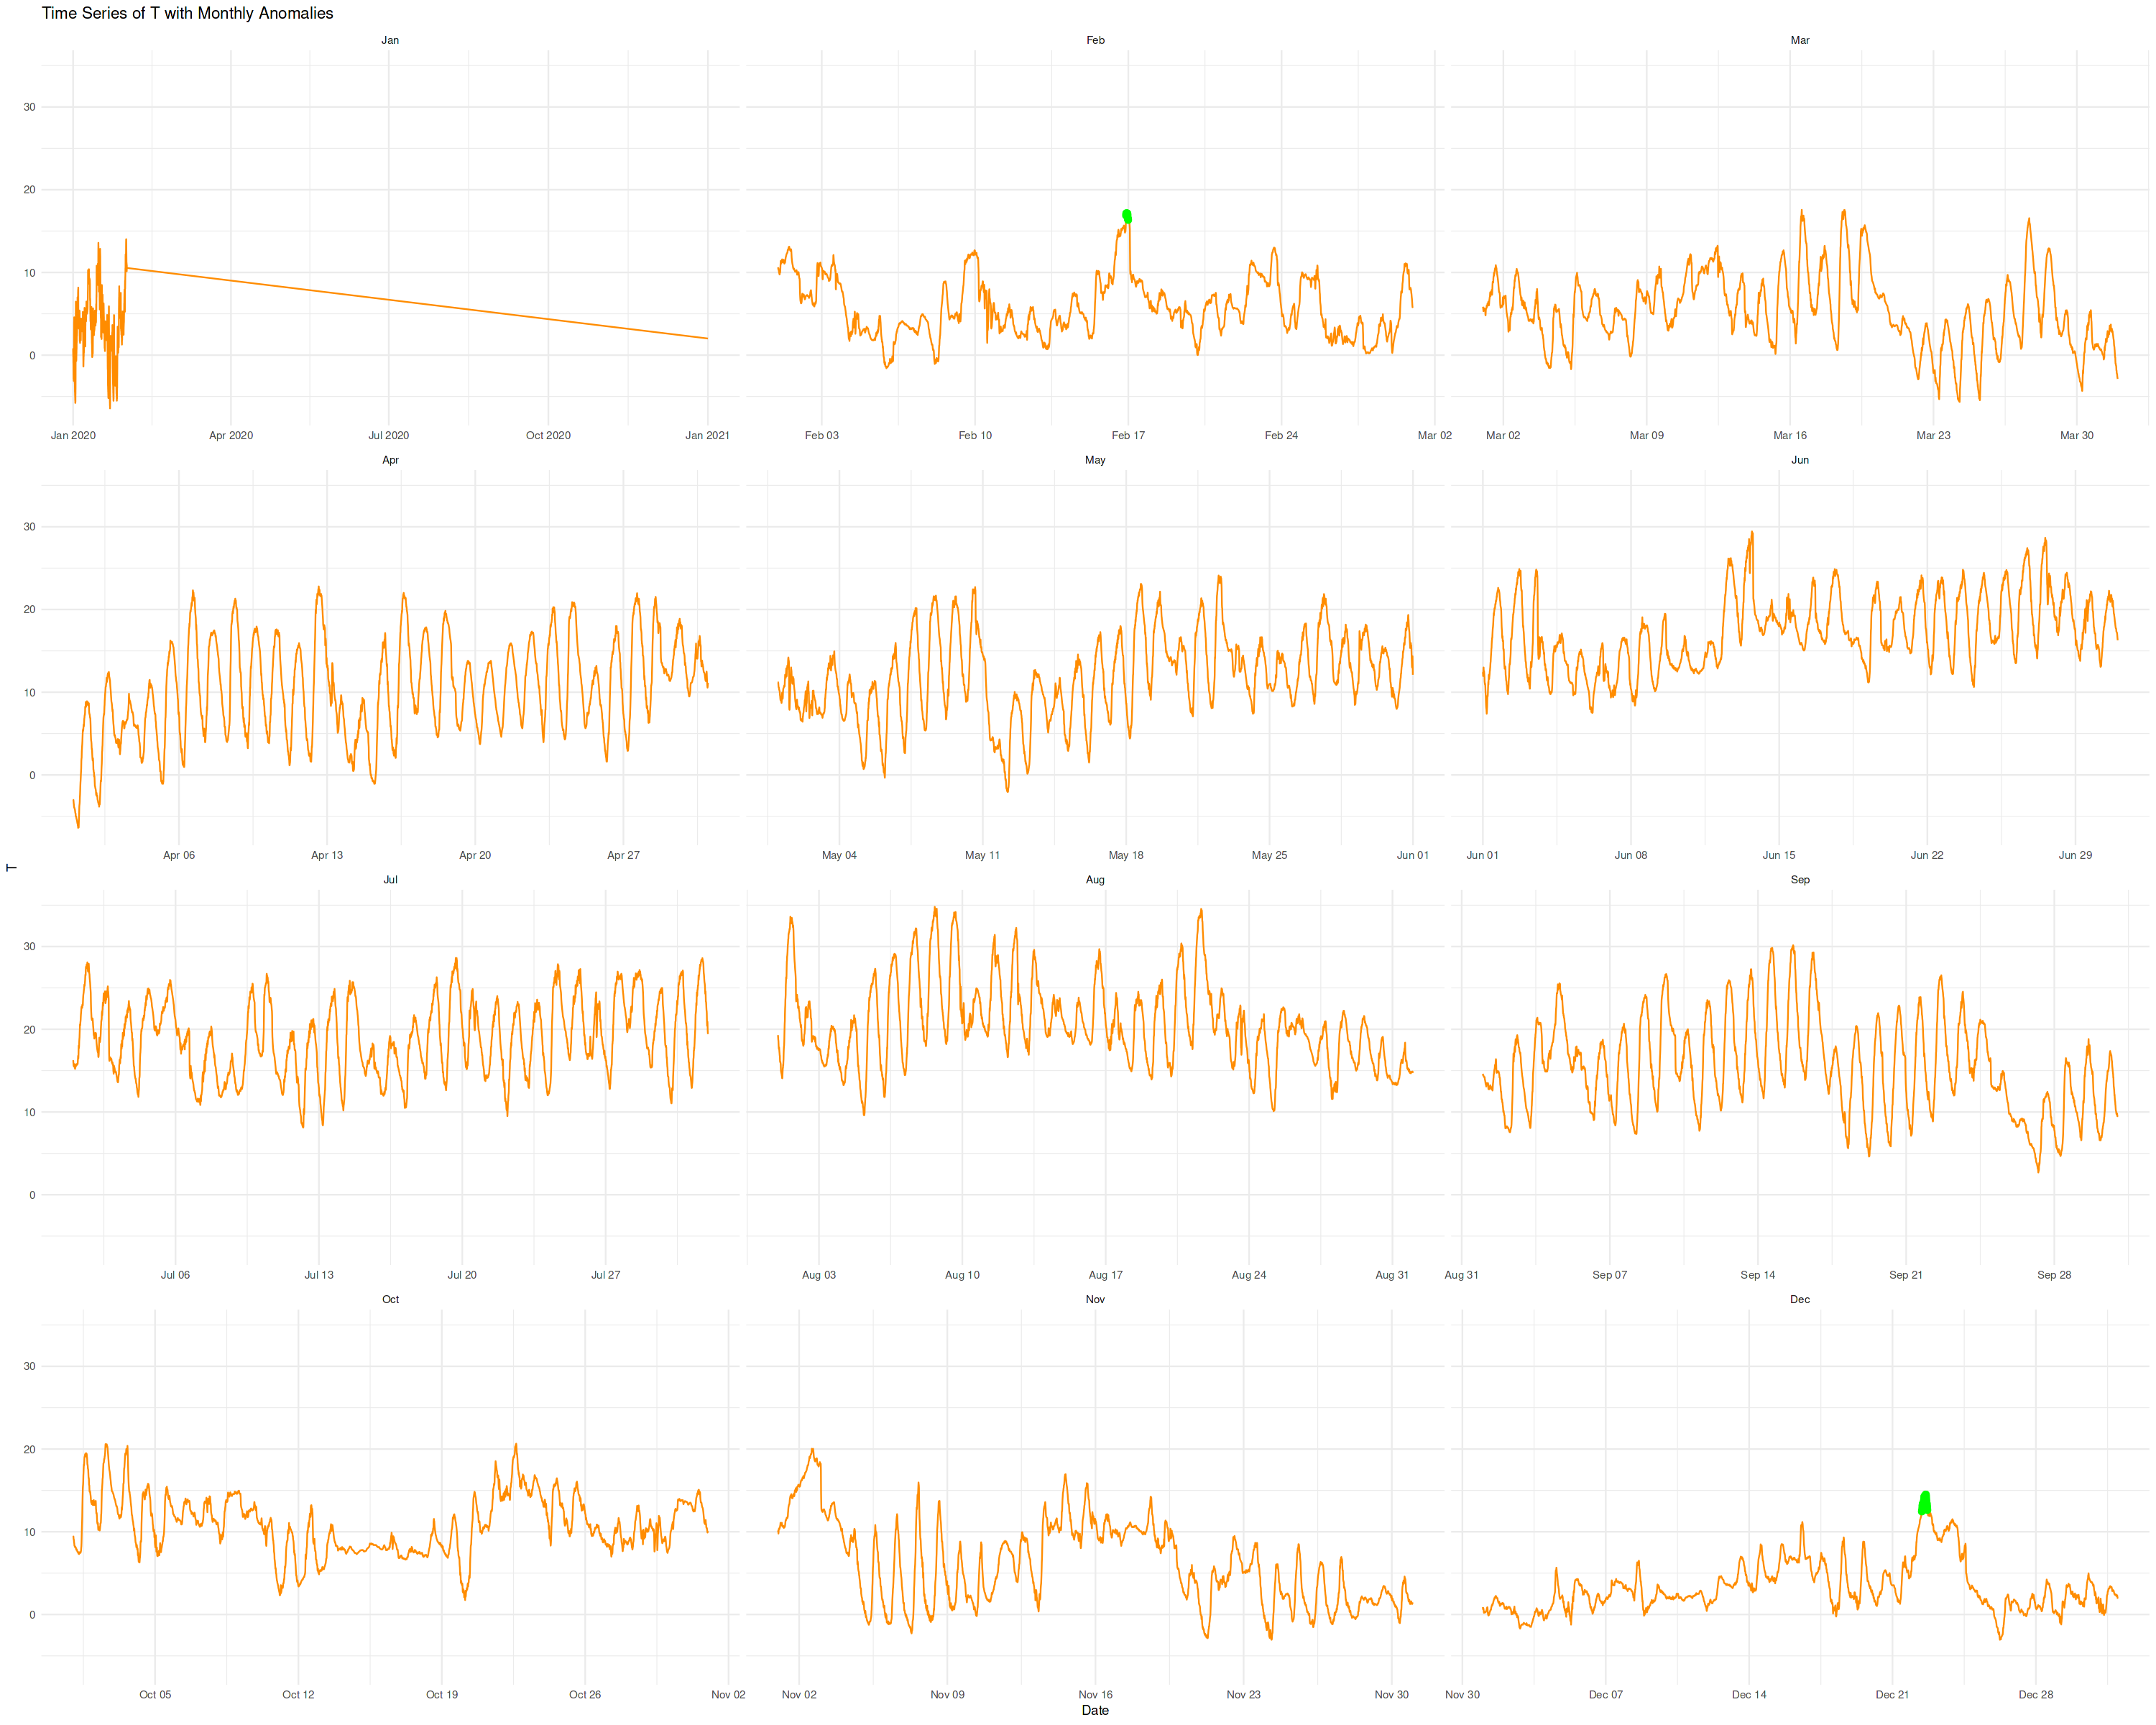

In [20]:
plot_anomaly_highlight <- function(df, var) {
  if (!is.numeric(df[[var]])) return(NULL)
  
  df <- df %>%
    group_by(month) %>%
    mutate(
      mean_val = mean(.data[[var]], na.rm = TRUE),
      sd_val = sd(.data[[var]], na.rm = TRUE),
      anomaly = abs(.data[[var]] - mean_val) > 3 * sd_val
    ) %>%
    ungroup()
  
  ggplot(df, aes(x = date, y = .data[[var]])) +
    geom_line(color = "darkorange", linewidth = 0.5) +
    geom_point(data = df %>% filter(anomaly), aes(y = .data[[var]]), color = "green", size = 2) +
    facet_wrap(~month, scales = "free_x", ncol = 3) +
    labs(title = paste("Time Series of", var, "with Monthly Anomalies"), x = "Date", y = var) +
    theme_minimal()
}

options(repr.plot.width=25, repr.plot.height=20)
plot_anomaly_highlight(df, "T")


In [21]:
df$date<-ymd_hms(df$date,tz="UTC")
df<-df%>%mutate(year=year(date),month=month(date),day=month(date))

Warning message:
“ 366 failed to parse.”


In [22]:
df<-df%>%select(-date)

In [23]:
datatable(head(df),options=list(scrollX=TRUE,scrollY="400px",pageLength=5,autoWidth=TRUE))

HTML widgets cannot be represented in plain text (need html)

In [24]:
sensor_cols <- c("Tpot", "Tdew", "rh", "VPmax", "VPact", "VPdef", "sh", 
                 "H2OC", "rho", "wv", "max..wv", "wd", "rain", "raining", 
                 "SWDR", "PAR", "max..PAR", "Tlog")
df_model <- df %>% select(all_of(sensor_cols))

df_plot <- df %>% select(year, month, day, hour, all_of(sensor_cols)) %>%arrange(year, month, day, hour)

datatable(head(df_model),options=list(scrollX=TRUE,scrollY="400px",pageLength=5,autoWidth=TRUE))

HTML widgets cannot be represented in plain text (need html)

In [25]:
datatable(head(df_plot),options=list(scrollX=TRUE,scrollY="400px",pageLength=5,autoWidth=TRUE))

HTML widgets cannot be represented in plain text (need html)

In [26]:
# After creating df_plot
write.csv(df_plot, "data_with_time.csv", row.names = FALSE)
cat("data_with_time.csv saved!\n")

data_with_time.csv saved!


In [27]:
# Scale sensor data only
scaler<-scale(df_model)
center<-attr(scaler,"scaled:center")
scale_val<-attr(scaler,"scaled:scale")

data_scaled<-as.matrix(scaler)
#parameters
SEQ_LEN<-60
N_FEATURES<-ncol(data_scaled)

#create Sequence
create_sequences<-function(data,seq_len){
    n<-nrow(data)
    seqs<-array(0,dim=c(n-seq_len,seq_len,ncol(data)))
    for (i in 1:(n-seq_len)){
        seqs[i,,]<-data[i:(i+seq_len-1),]
    }
    seqs
}

In [28]:
sequences<-create_sequences(data_scaled,SEQ_LEN)
cat("Sequences:", dim(sequences), "\n")

Sequences: 52636 60 18 


# Train/Test Split

In [29]:
split_idx <- floor(0.8 * dim(sequences)[1])
x_train <- sequences[1:split_idx, , ]
x_val   <- sequences[(split_idx + 1):dim(sequences)[1], , ]

# Model

In [30]:

model <- keras_model_sequential() %>%
  layer_lstm(64, return_sequences = TRUE,
             input_shape = c(SEQ_LEN, N_FEATURES)) %>%
  layer_dropout(0.2) %>%
  layer_lstm(16, return_sequences = FALSE) %>%
  layer_repeat_vector(SEQ_LEN) %>%
  layer_lstm(16, return_sequences = TRUE) %>%
  layer_dropout(0.2) %>%
  layer_lstm(64, return_sequences = TRUE) %>%
  layer_dense(units=N_FEATURES)   


learning_rate <- 0.001


model %>% compile(
  optimizer = optimizer_adam(learning_rate = learning_rate),
  loss = "mae"
)

summary(model)


Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 lstm_3 (LSTM)                      (None, 60, 64)                  21248       
 dropout_1 (Dropout)                (None, 60, 64)                  0           
 lstm_2 (LSTM)                      (None, 16)                      5184        
 repeat_vector (RepeatVector)       (None, 60, 16)                  0           
 lstm_1 (LSTM)                      (None, 60, 16)                  2112        
 dropout (Dropout)                  (None, 60, 16)                  0           
 lstm (LSTM)                        (None, 60, 64)                  20736       
 dense (Dense)                      (None, 60, 18)                  1170        
Total params: 50,450
Trainable params: 50,450
Non-trainable params: 0
________________________________________________________________________________


In [31]:
tensorflow::tf$compat$v1$logging$set_verbosity(tensorflow::tf$compat$v1$logging$INFO)


In [32]:
cat("Input shape:", paste0("(batch, ", SEQ_LEN, ", ", N_FEATURES, ")\n"))
cat("Output shape:", paste0("(batch, ", SEQ_LEN, ", ", N_FEATURES, ")\n"))

Input shape: (batch, 60, 18)
Output shape: (batch, 60, 18)


In [33]:
#start time
start_time <- Sys.time()

history <- model %>% fit(x = x_train, y = x_train,validation_data = list(x_val, x_val),
  epochs = 100, 
  batch_size = 32,verbose=2,
  callbacks = list(
    callback_early_stopping(
      patience = 5, 
      restore_best_weights = TRUE
    )
  )
)
# End time
end_time <- Sys.time()

# Total training time
training_time <- end_time - start_time
print(training_time)

Time difference of 5.75944 mins


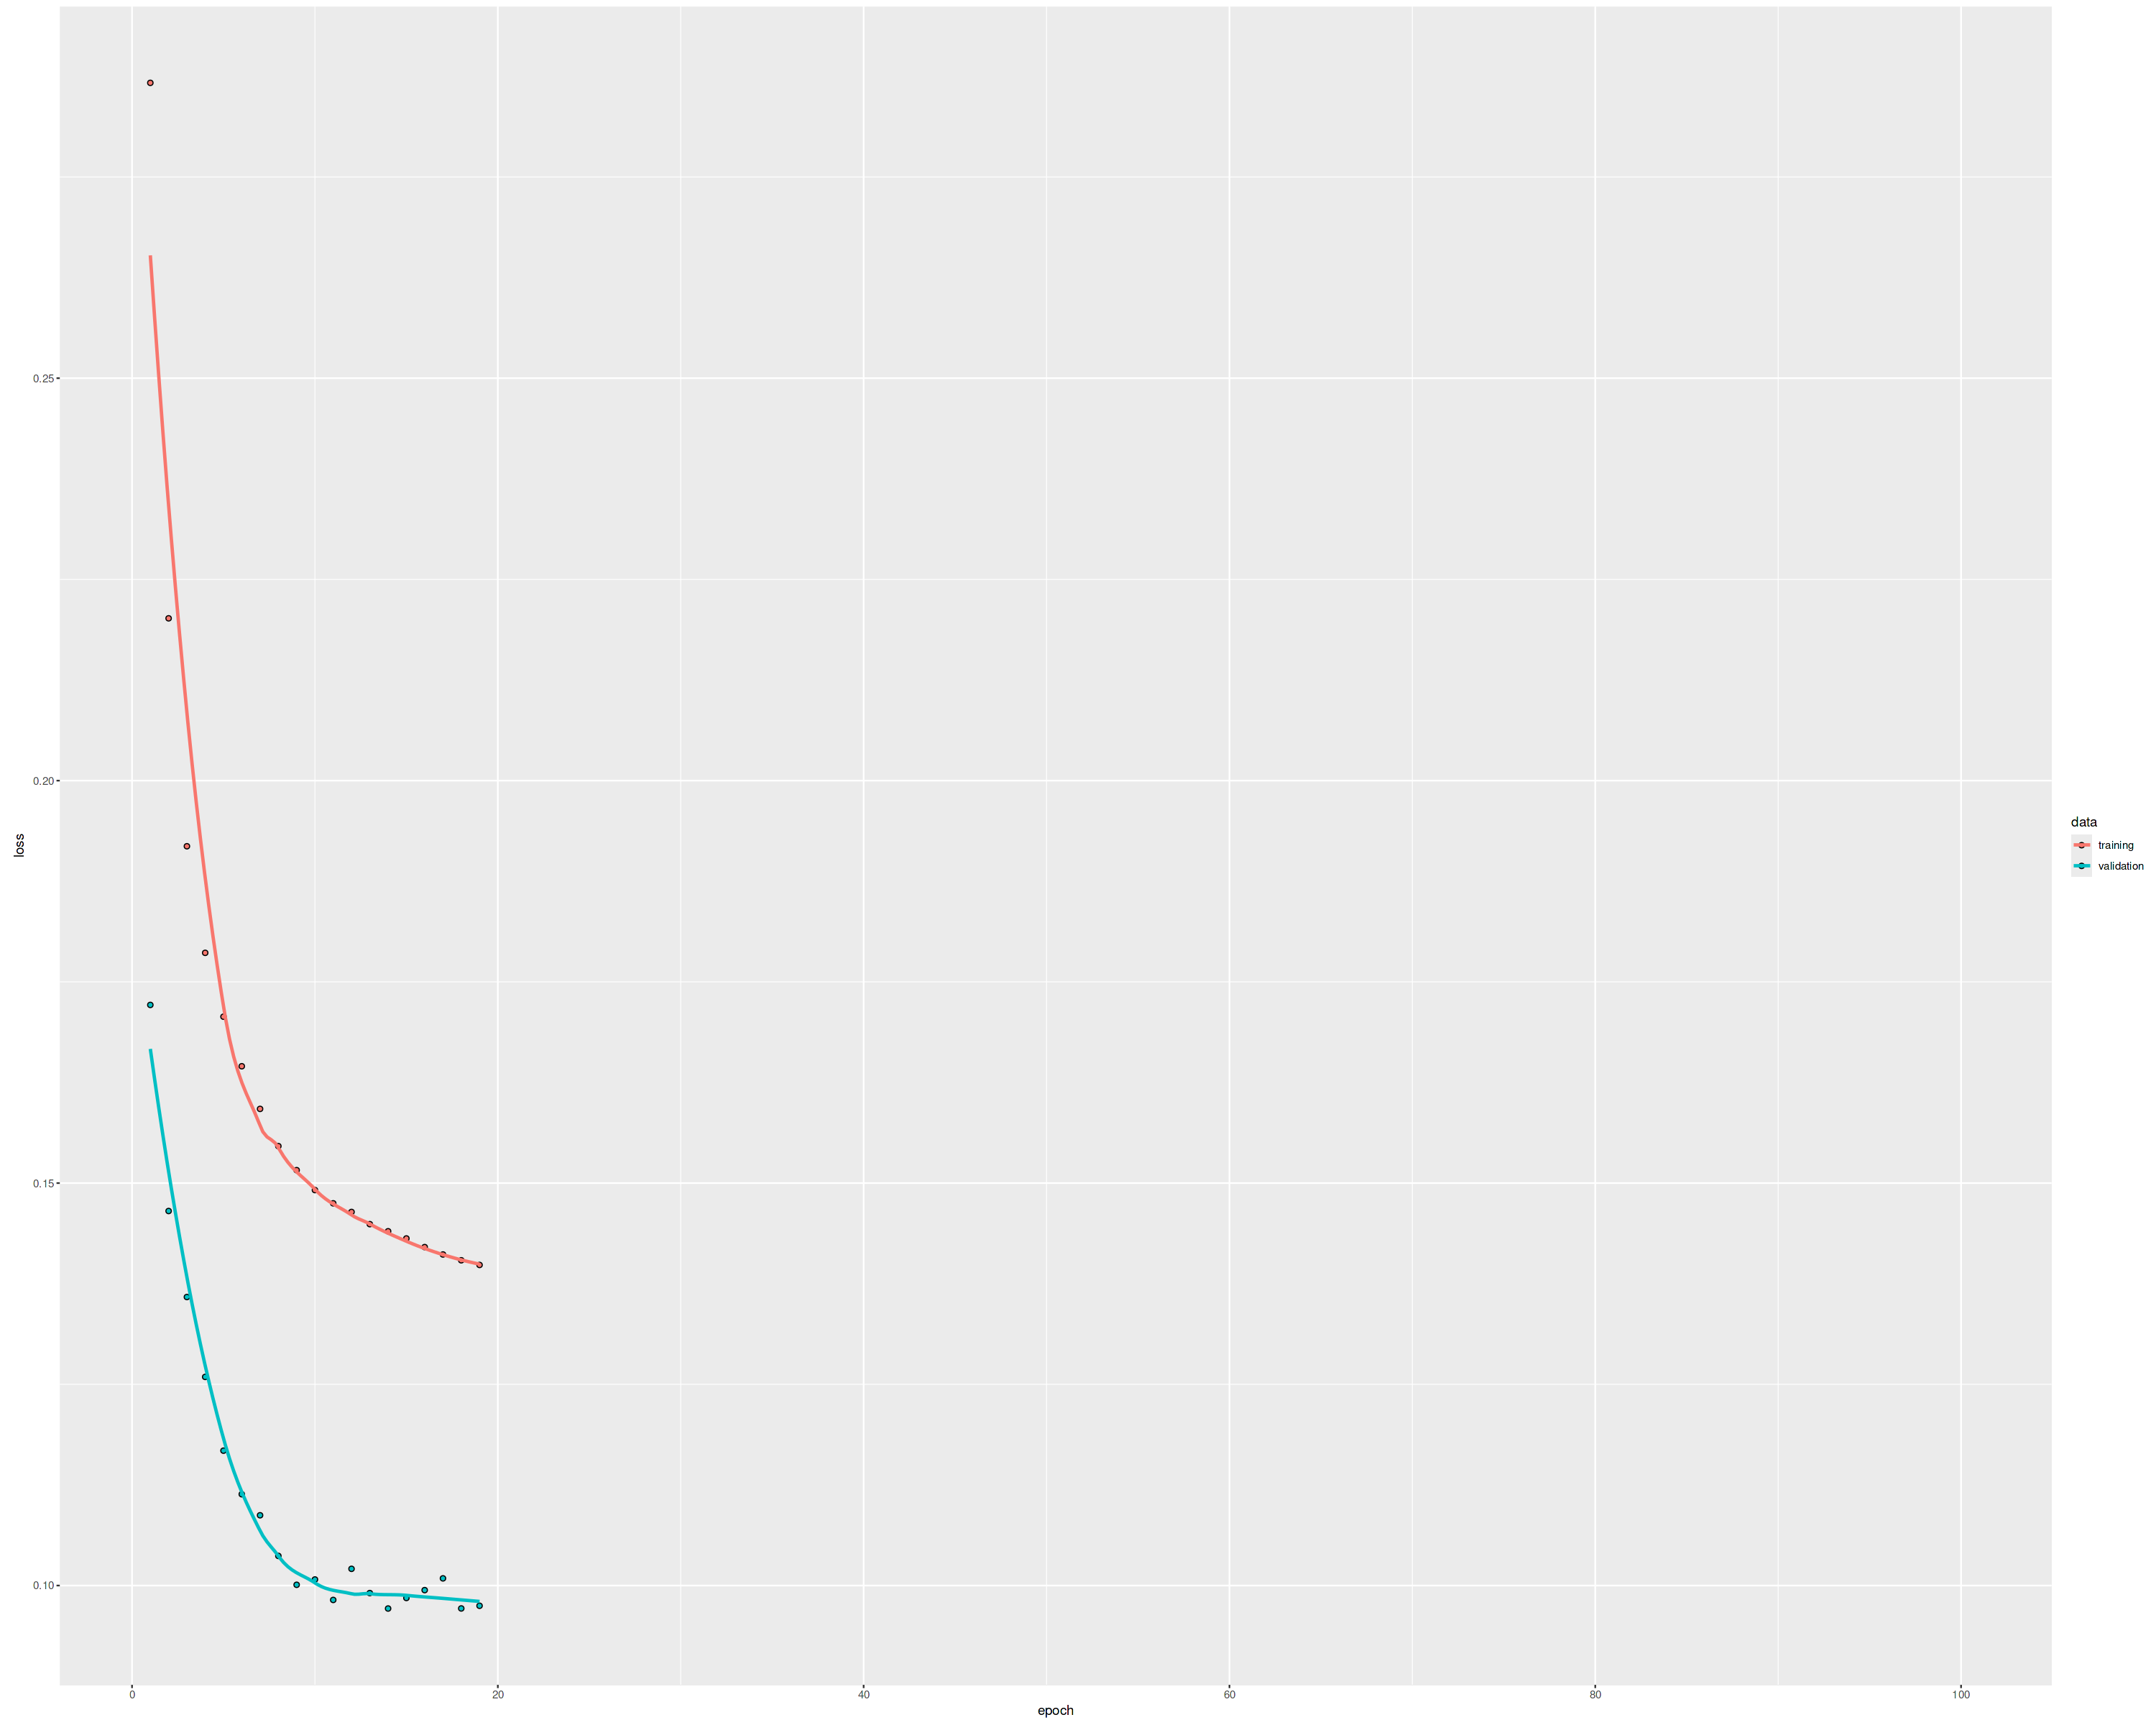

In [34]:
print(plot(history))

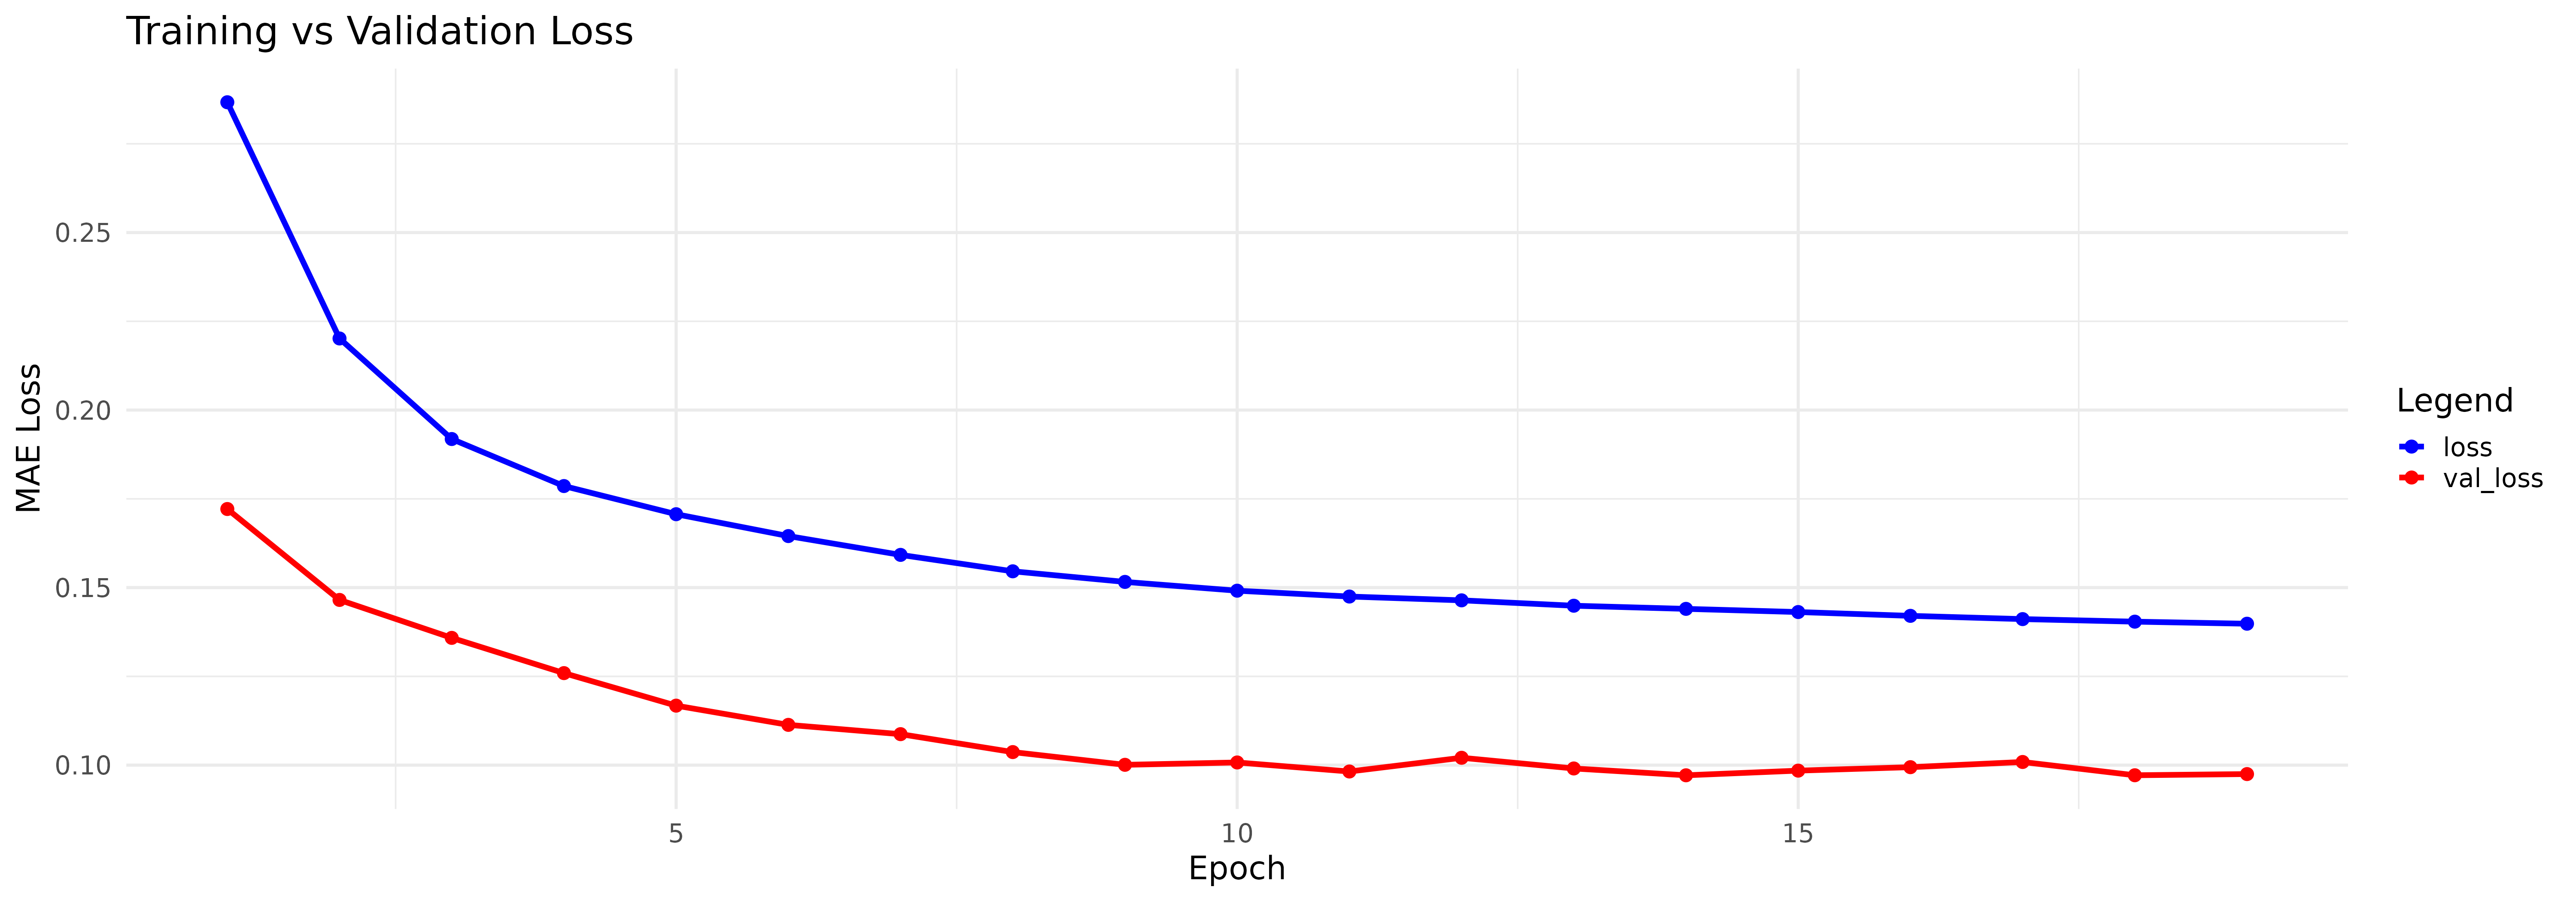

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG     6000   2100 sRGB       TRUE    173791 118x118


In [35]:
df <- data.frame(epoch = 1:length(history$metrics$loss),loss = history$metrics$loss,val_loss = history$metrics$val_loss)

df_melt <- melt(df, id.vars = "epoch", variable.name = "type", value.name = "MAE_Loss")

p <- ggplot(df_melt, aes(x = epoch, y = MAE_Loss, color = type)) +geom_line(linewidth = 1.5) + geom_point(size = 3) +labs(title = "Training vs Validation Loss",
       x = "Epoch",y = "MAE Loss",color = "Legend") + theme_minimal(base_size = 18) +
  scale_color_manual(values = c("loss" = "blue", "val_loss" = "red"))

# Save with increased size: width = 20, height = 10 inches
ggsave("loss_plot.png", plot = p, width = 20, height = 7, units = "in")


img <- image_read("/kaggle/working/loss_plot.png")
print(img)

In [36]:
x_pred <- model %>% predict(sequences, batch_size = 32)
mae_seq <- rowMeans(abs(sequences - x_pred), dims = 2)
mae_per_sample <- rowMeans(mae_seq)

threshold <- mean(mae_per_sample) + 3 * sd(mae_per_sample)
anomaly_flags <- as.integer(mae_per_sample > threshold)

cat("Threshold:", round(threshold, 4), "\n")

Threshold: 0.339 


In [37]:
submission <- data.frame(is_anomaly = anomaly_flags)
write.csv(submission, "submission.csv", row.names = FALSE)
cat("submission.csv saved → ONLY is_anomaly\n")

submission.csv saved → ONLY is_anomaly


In [38]:
# Skip first SEQ_LEN rows to align
result_df <- df_plot %>%slice((SEQ_LEN + 1):n()) %>% mutate(is_anomaly = anomaly_flags)

head(result_df)

year month day hour Tpot   Tdew rh   VPmax VPact VPdef ⋯ wv   max..wv wd   
1 2020 1     1   0    275.89 0.13 84.2 7.32  6.16  1.16  ⋯ 2.28 3.89    171.9
2 2020 1     1   0    275.79 0.14 84.9 7.27  6.17  1.10  ⋯ 3.20 5.11    169.3
3 2020 1     1   0    275.84 0.23 85.1 7.30  6.21  1.09  ⋯ 1.88 3.29    177.8
4 2020 1     1   0    276.12 0.53 85.3 7.44  6.35  1.09  ⋯ 1.89 4.13    187.3
5 2020 1     1   0    276.39 0.61 84.2 7.58  6.38  1.20  ⋯ 1.20 2.40    175.8
6 2020 1     1   0    278.45 1.98 83.8 8.41  7.05  1.36  ⋯ 4.13 5.89    209.2
  rain raining SWDR PAR max..PAR Tlog  is_anomaly
1 0    0       0    0   0        12.58 0         
2 0    0       0    0   0        12.64 0         
3 0    0       0    0   0        12.67 0         
4 0    0       0    0   0        12.70 0         
5 0    0       0    0   0        12.74 0         
6 0    0       0    0   0        13.17 0

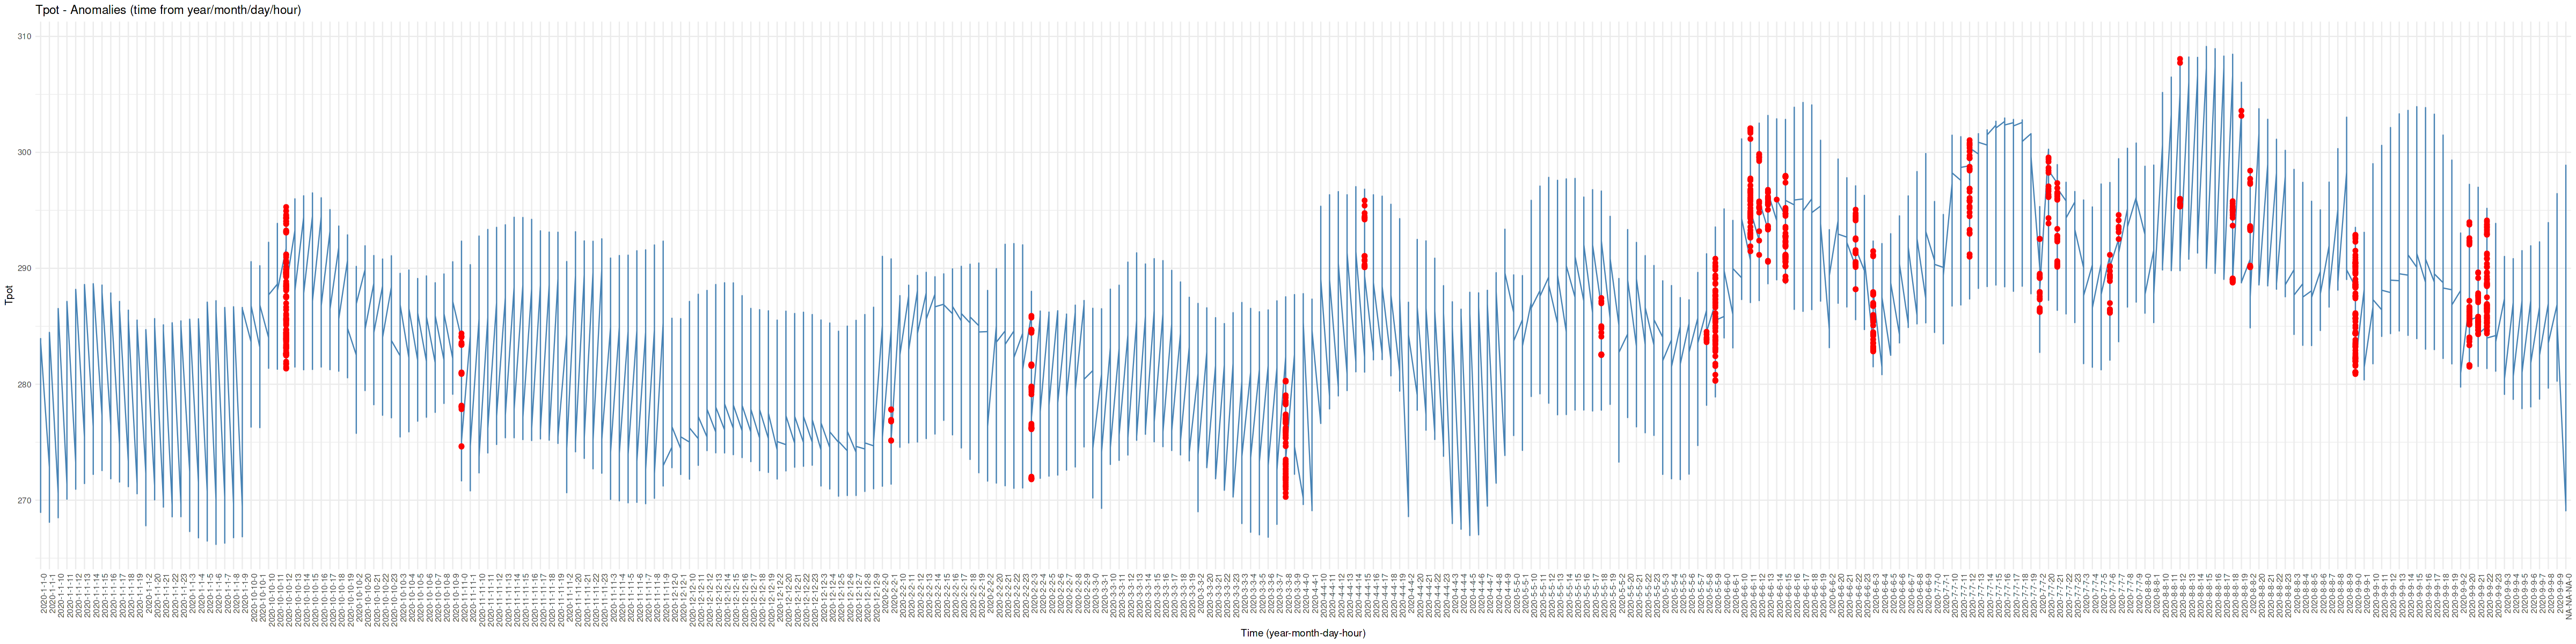

In [39]:
library(ggplot2)
library(dplyr)

result_df <- result_df %>% mutate(time_str = paste(year, month, day, hour, sep = "-"))

options(repr.plot.width = 40, repr.plot.height = 10)

ggplot(result_df, aes(x = time_str, y = Tpot, group = 1)) +
  geom_line(color = "steelblue") +
  geom_point(data = filter(result_df, is_anomaly == 1), 
             color = "red", size = 2) +
  labs(title = "Tpot - Anomalies (time from year/month/day/hour)", 
       x = "Time (year-month-day-hour)", y = "Tpot") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

ggsave("Tpot_plot.png", width = 12, height = 6)


In [40]:
result_df <- result_df %>% mutate(mae = mae_per_sample)

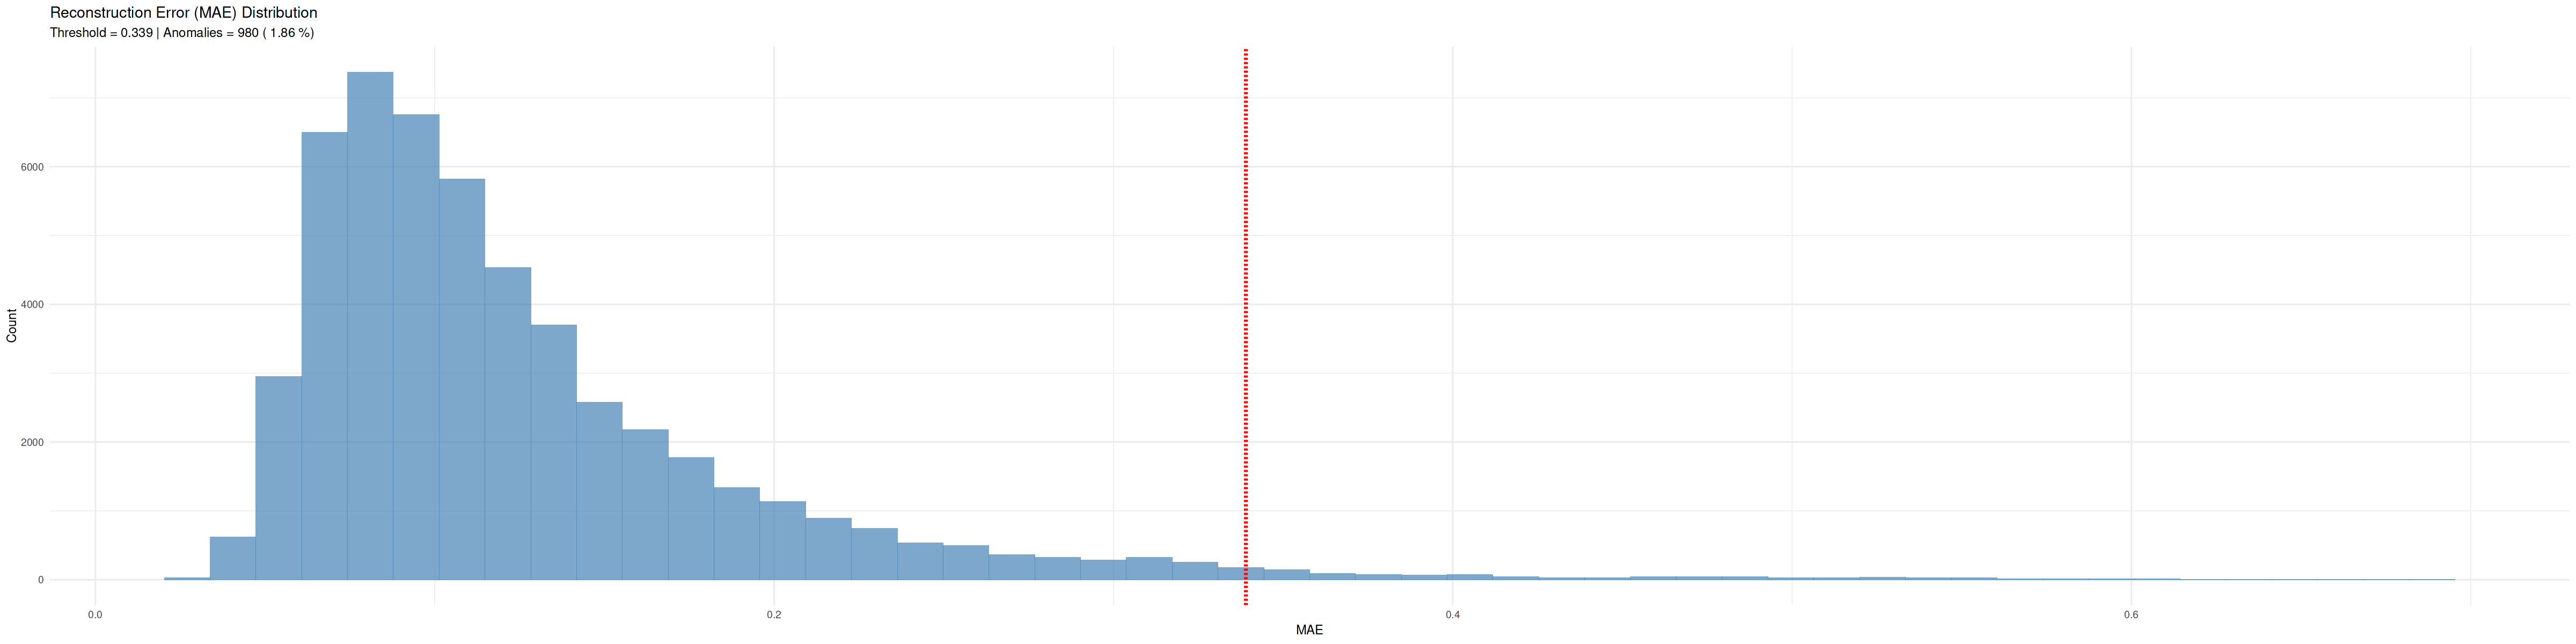

In [41]:
p1 <- ggplot(data.frame(mae = mae_per_sample), aes(x = mae)) +
  geom_histogram(bins = 50, fill = "steelblue", alpha = 0.7) +
  geom_vline(xintercept = threshold, color = "red", linewidth = 1.5, linetype = "dashed") +
  labs(title = "Reconstruction Error (MAE) Distribution",
       subtitle = paste("Threshold =", round(threshold, 4),
                        "| Anomalies =", sum(anomaly_flags),
                        "(", round(100*mean(anomaly_flags), 2), "%)"),
       x = "MAE", y = "Count") +
  theme_minimal(base_size = 14)
p1


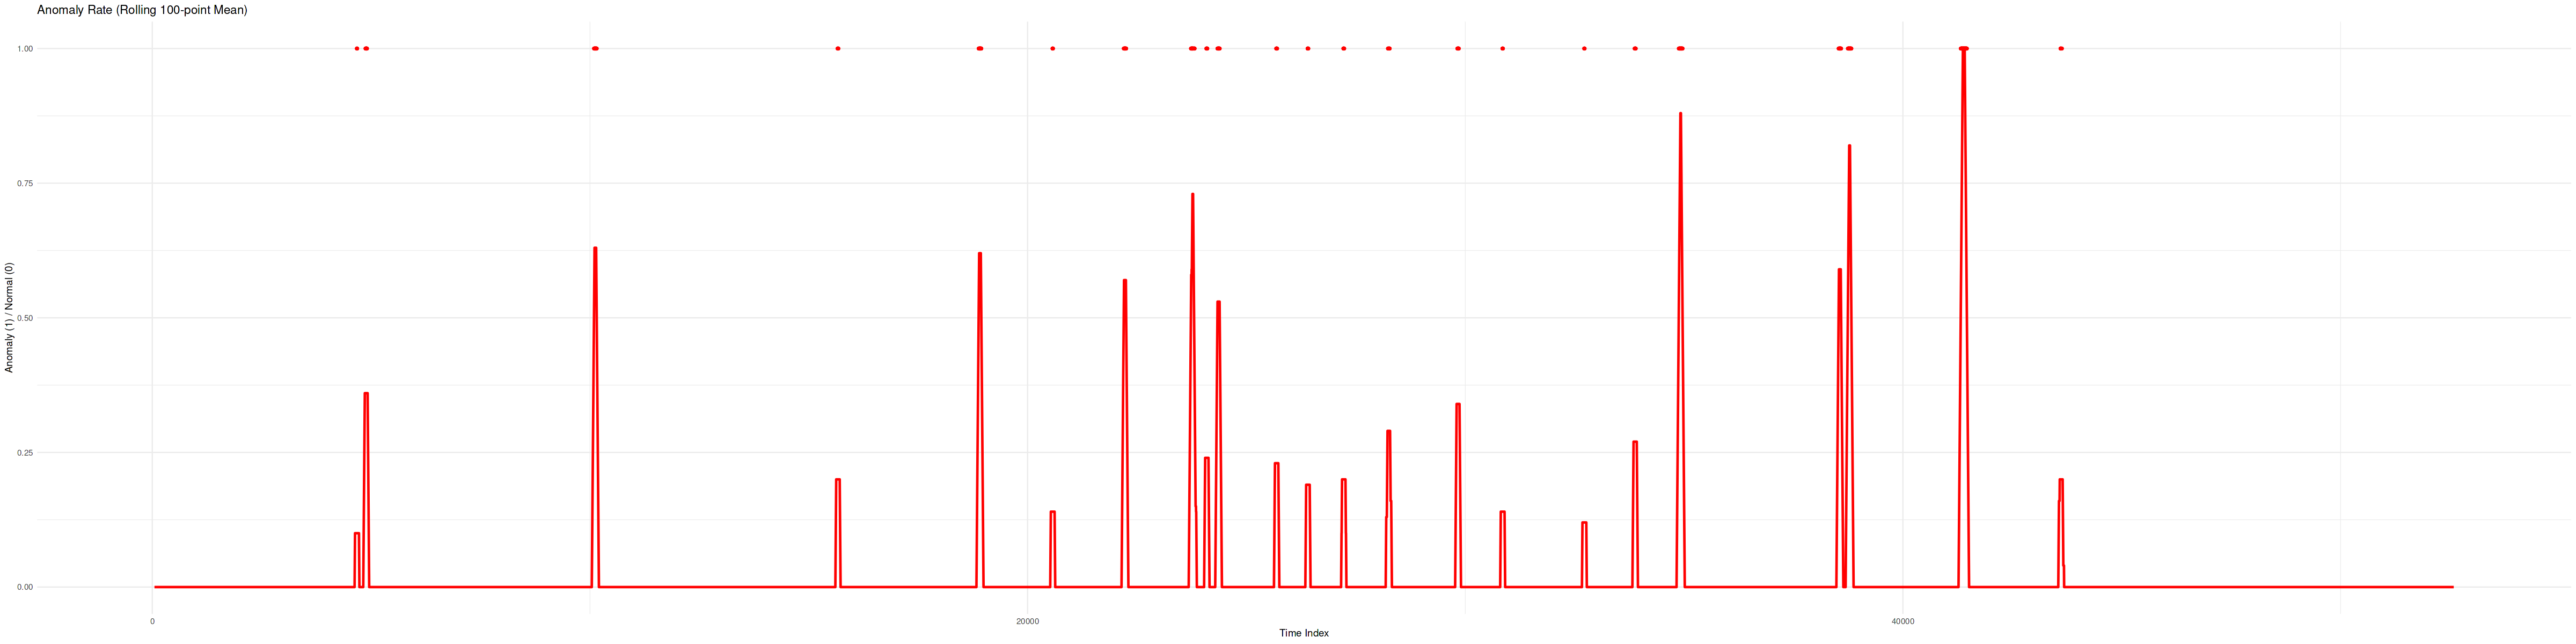

In [42]:
result_df$index <- 1:nrow(result_df)
result_df <- result_df %>%
  mutate(anomaly_roll = zoo::rollmean(is_anomaly, k = 100, fill = NA, align = "center"))

p2 <- ggplot(result_df, aes(x = index)) +
  geom_line(aes(y = anomaly_roll), color = "red", na.rm = TRUE, linewidth = 1) +
  geom_point(data = filter(result_df, is_anomaly == 1), aes(y = is_anomaly),
             color = "red", size = 1, alpha = 0.6) +
  labs(title = "Anomaly Rate (Rolling 100-point Mean)",
       x = "Time Index", y = "Anomaly (1) / Normal (0)") +
  theme_minimal()
p2


=== TOP 5 ANOMALIES ===
# A tibble: 5 × 7
   year month   day  hour  Tpot   mae is_anomaly
  <dbl> <dbl> <dbl> <int> <dbl> <dbl>      <int>
1  2020     9     9     0  284. 0.693          1
2  2020     9     9     0  283. 0.692          1
3  2020     9     9     0  282. 0.692          1
4  2020     9     9     0  283. 0.691          1
5  2020     9     9     0  283. 0.688          1

=== FINAL EVALUATION SUMMARY ===
Total points: 52636 
Anomalies detected: 980 
Anomaly rate: 1.862 %
Training time: 345.57 seconds
Threshold (MAE): 0.339 
Model: LSTM Autoencoder (R + Keras)


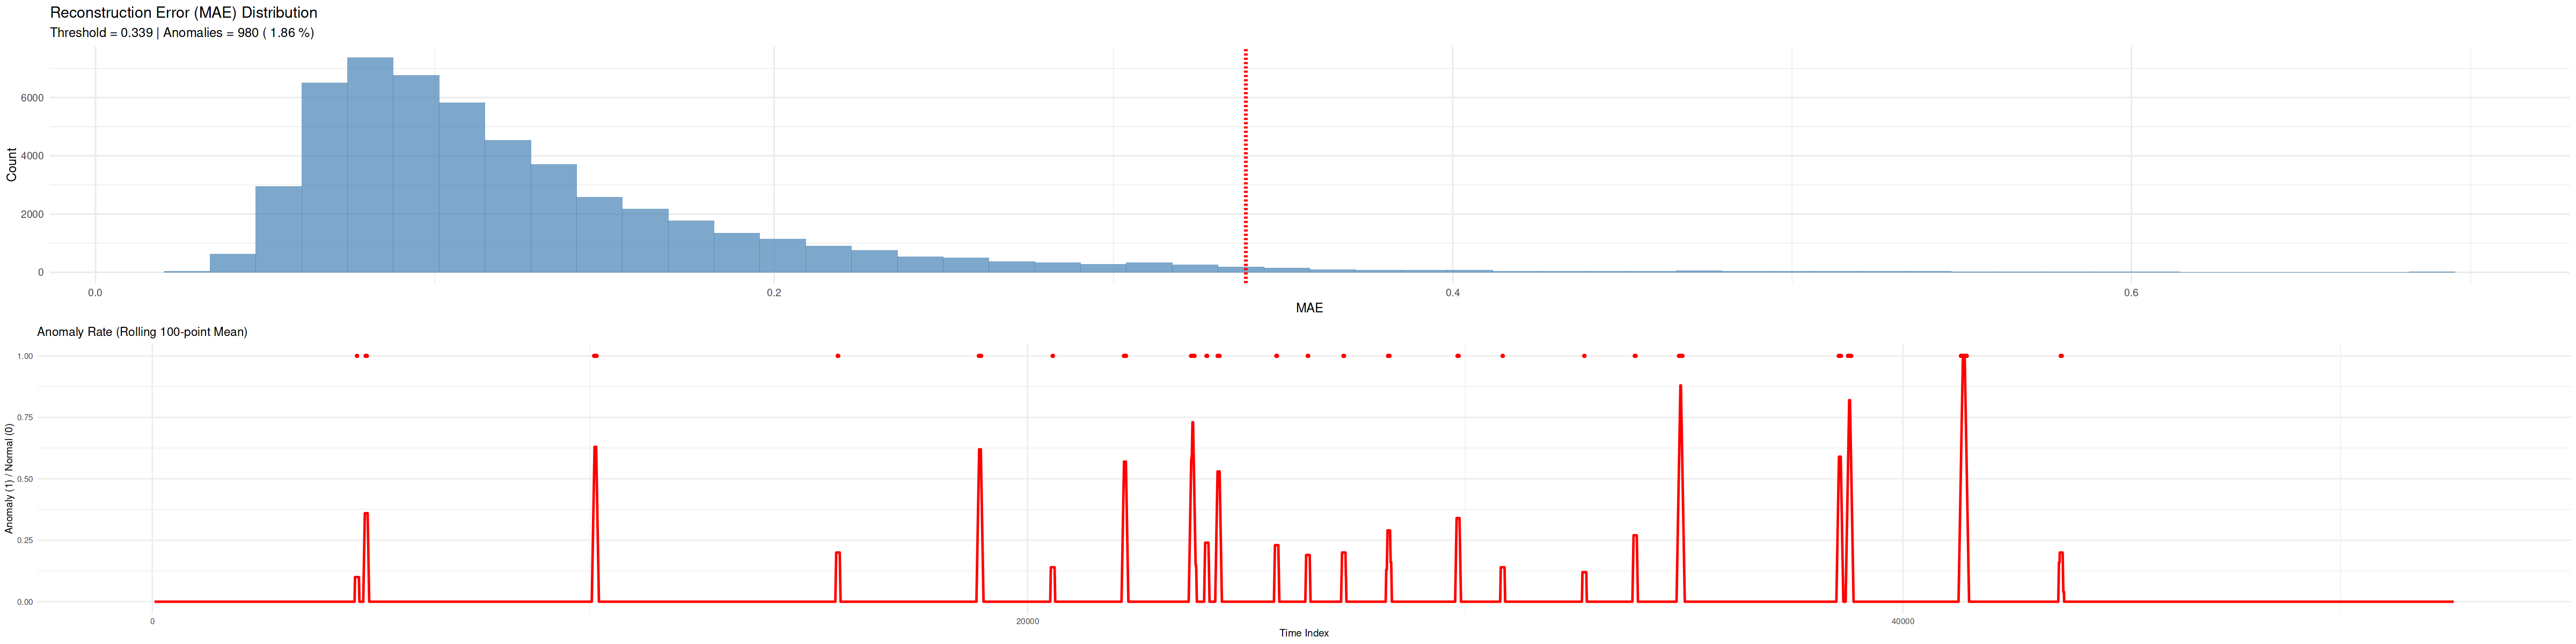

In [43]:
top_anomalies <- result_df %>% arrange(desc(mae)) %>% head(5) %>% select(year, month, day, hour, Tpot, mae, is_anomaly) %>%
  mutate(mae = round(mae, 4))

cat("=== TOP 5 ANOMALIES ===\n")
print(top_anomalies)

grid.arrange(p1, p2, ncol = 1)
ggsave("evaluation_report.png", width = 14, height = 10, dpi = 150)
write.csv(top_anomalies, "top_anomalies.csv", row.names = FALSE)

cat("\n=== FINAL EVALUATION SUMMARY ===\n")
cat("Total points:", nrow(result_df), "\n")
cat("Anomalies detected:", sum(anomaly_flags), "\n")
cat("Anomaly rate:", round(100*mean(anomaly_flags), 3), "%\n")
cat("Training time:", round(as.numeric(training_time, units = "secs"), 2), "seconds\n")
cat("Threshold (MAE):", round(threshold, 4), "\n")
cat("Model: LSTM Autoencoder (R + Keras)\n")


In [44]:
# Save threshold and stats for Shiny app
model_stats <- data.frame(
  threshold = threshold,
  total_points = nrow(result_df),
  anomalies = sum(anomaly_flags),
  anomaly_rate = mean(anomaly_flags)
)

write.csv(model_stats, "model_stats.csv", row.names = FALSE)
cat("model_stats.csv saved!\n")

model_stats.csv saved!


# app.R

In [45]:
# # ========================================
# # app.R - FINAL SHINY DASHBOARD (R STUDIO)
# # ========================================
# library(shiny)
# library(ggplot2)
# library(dplyr)
# library(DT)
# library(lubridate)

# # --- LOAD DATA ---
# submission   <- read.csv("submission.csv")
# df_raw       <- read.csv("data_with_time.csv")
# model_stats  <- read.csv("model_stats.csv")  

# # --- CREATE DATETIME SAFELY ---
# SEQ_LEN <- 60

# df_plot <- df_raw %>%
#   slice((SEQ_LEN + 1):n()) %>%
#   mutate(
#     datetime = ymd_h(paste(year, month, day, hour), quiet = TRUE),
#     datetime = if_else(is.na(datetime),
#                        as.POSIXct("2020-01-01") + hours(row_number()),
#                        datetime),
#     date = as.Date(datetime),
#     is_anomaly = submission$is_anomaly
#   ) %>%
#   select(date, datetime, year, month, day, hour,
#          Tpot, Tdew, rh, VPmax, VPact, VPdef, sh,
#          H2OC, rho, wv, `max..wv`, wd, rain, raining,
#          SWDR, PAR, `max..PAR`, Tlog, is_anomaly)

# # --- UI ---
# ui <- fluidPage(
#   titlePanel("IoT Anomaly Detection - LSTM Autoencoder"),
#   sidebarLayout(
#     sidebarPanel(
#       selectInput("sensor", "Select Sensor:",
#                   choices = names(df_plot)[7:24], selected = "Tpot"),
#       dateRangeInput("date_range", "Date Range:",
#                      start = min(df_plot$date, na.rm = TRUE),
#                      end = max(df_plot$date, na.rm = TRUE),
#                      format = "yyyy-mm-dd"),
#       h4("Model Summary"),
#       verbatimTextOutput("summary")
#     ),
#     mainPanel(
#       plotOutput("plot", height = "600px"),
#       DTOutput("table")
#     )
#   )
# )

# # --- SERVER ---
# server <- function(input, output) {
  
#   filtered <- reactive({
#     df_plot %>%
#       filter(date >= input$date_range[1],
#              date <= input$date_range[2])
#   })
  
#   output$plot <- renderPlot({
#     ggplot(filtered(), aes(x = datetime, y = .data[[input$sensor]])) +
#       geom_line(color = "steelblue", size = 0.8) +
#       geom_point(data = filter(filtered(), is_anomaly == 1),
#                  color = "red", size = 2.5, alpha = 0.8) +
#       scale_x_datetime(date_breaks = "1 day", date_labels = "%b %d") +
#       labs(title = paste("Sensor:", input$sensor, "| Red = Anomaly"),
#            x = "Date", y = input$sensor) +
#       theme_minimal(base_size = 14) +
#       theme(axis.text.x = element_text(angle = 45, hjust = 1))
#   })
  
#   output$table <- renderDT({
#     filtered() %>%
#       filter(is_anomaly == 1) %>%
#       select(datetime, all_of(input$sensor)) %>%
#       mutate(datetime = format(datetime, "%Y-%m-%d %H:%M")) %>%
#       rename(Time = datetime, Value = all_of(input$sensor)) %>%
#       datatable(options = list(pageLength = 8, scrollX = TRUE))
#   })
  
#   # FIXED: Use model_stats$threshold
#   output$summary <- renderText({
#     paste0(
#       "Total Points: ", model_stats$total_points, "\n",
#       "Anomalies: ", model_stats$anomalies, 
#       " (", round(100 * model_stats$anomaly_rate, 2), "%)\n",
#       "Threshold: ", round(model_stats$threshold, 4), "\n",
#       "Model: LSTM Autoencoder (R + Keras)"
#     )
#   })
# }

# # --- RUN ---
# shinyApp(ui, server)